In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")

In [3]:
df.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

In [5]:
#NUMERICOS ENTEROS QUE ERAN INNECESARIAMENTE FLOAT
#------------------------------------------------#

#NUMERICOS QUE SOLO SON CERO O UNO
df['usosmultiples'] = df['usosmultiples'].astype(np.int8)
df['piscina'] = df['piscina'].astype(np.int8)
df['gimnasio'] = df['gimnasio'].astype(np.int8)
df['escuelascercanas'] = df['escuelascercanas'].astype(np.int8)
df['centroscomercialescercanos'] = df['centroscomercialescercanos'].astype(np.int8)


#FECHA DE PUBLICACION A DATETIME
df['fecha'] = pd.to_datetime(df['fecha'])


# A estos hay que limpiarles los inf y los NaN antes de convertir a int

#df['antiguedad'] = df.antiguedad.astype('int64')
#df['garages'] = df.garages.astype('int64')
#df['habitaciones'] = df.habitaciones.astype('int64')
#df['metrostotales'] = df.metrostotales.astype('int64')
#df['metroscubiertos'] = df.metroscubiertos.astype('int64')
#df['idzona'] = df.idzona.astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

In [6]:
# A estos hay que limpiarles los inf y los NaN antes de convertir a int
#df['antiguedad'] = df.antiguedad.astype('int64')
#df['garages'] = df.garages.astype('int64')
#df['habitaciones'] = df.habitaciones.astype('int64')
#df['metrostotales'] = df.metrostotales.astype('int64')
#df['metroscubiertos'] = df.metroscubiertos.astype('int64')
#df['idzona'] = df.idzona.astype('int64')

In [7]:
# Porcentaje de NaN's por columna, sabiendo que existen 240.000 filas
df.isnull().sum() / 240000 * 100

id                             0.000000
titulo                         2.244583
descripcion                    0.674583
tipodepropiedad                0.019167
direccion                     22.113333
ciudad                         0.155000
provincia                      0.064583
antiguedad                    18.147917
habitaciones                   9.362917
garages                       15.735417
banos                         10.925417
metroscubiertos                7.250000
metrostotales                 21.444583
idzona                        11.925417
lat                           51.453333
lng                           51.453333
fecha                          0.000000
gimnasio                       0.000000
usosmultiples                  0.000000
piscina                        0.000000
escuelascercanas               0.000000
centroscomercialescercanos     0.000000
precio                         0.000000
dtype: float64

In [8]:
dropdown_categories = df.loc[:,['provincia','ciudad','habitaciones','garages','tipo_de_propiedad']]
dropdown_categories.isnull().sum() / 240000 * 100

/home/lorenzo/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


provincia              0.064583
ciudad                 0.155000
habitaciones           9.362917
garages               15.735417
tipo_de_propiedad    100.000000
dtype: float64

In [9]:
# Voy a estudiar el % de completitud de las categorias de interes año a año
df['fecha'] = pd.to_datetime(df['fecha'])

nulos_por_anio = df.drop(['descripcion','tipodepropiedad','ciudad','provincia','metroscubiertos'
                          ,'gimnasio','usosmultiples','piscina','escuelascercanas'
                          ,'centroscomercialescercanos','precio', 'idzona', 'id', 'fecha', 'lng'],1)

nulos_por_anio['anio'] = df['fecha'].dt.year
nulos_por_anio.head()

def contar_nulos(serie):
    
    serie = serie.apply(lambda x: 1 if pd.isnull(x) else 0)#.apply(hacer_dos)
    return np.sum(serie)
    
nulos_por_anio_cat = nulos_por_anio.groupby('anio').agg(contar_nulos).reset_index()
totales_por_anio = nulos_por_anio.groupby('anio')['lat'].agg(len).reset_index()
totales_por_anio = totales_por_anio.rename(columns={'lat' : 'totales'})

pct_nulos_por_anio_cat = pd.merge(nulos_por_anio_cat, totales_por_anio, on = 'anio', how = 'inner')

def sacar_porcentaje(serie):
    
    copia_anios = serie['anio']
    copia_totales = serie['totales']
    serie_porcentual = serie / copia_totales * 100
    
    serie_porcentual['anio'] = copia_anios
    serie_porcentual['totales'] = copia_totales
    
    return serie_porcentual

pct_nulos_por_anio_cat = pct_nulos_por_anio_cat.apply(sacar_porcentaje, axis = 1)
pct_nulos_por_anio_cat['anio'] = pct_nulos_por_anio_cat['anio'].astype(np.int32)
pct_nulos_por_anio_cat['totales'] = pct_nulos_por_anio_cat['totales'].astype(np.int32)


In [10]:
pct_nulos_por_anio_cat.head()

,anio,titulo,direccion,antiguedad,habitaciones,garages,banos,metrostotales,lat,totales
0,2012,11.332540,10.605932,0.254950,8.965752,8.778788,10.346732,29.072831,59.909068,23534
1,2013,1.951557,25.857303,1.471072,8.809978,8.118871,10.123083,25.742118,34.683736,30386
2,2014,2.627428,26.515824,23.925367,10.386473,13.159322,11.081534,21.909198,58.678399,40572
3,2015,1.225957,29.516223,28.305809,9.129590,15.181659,10.953954,19.265592,58.721585,51470
4,2016,0.457262,17.832153,19.962143,9.327081,21.352007,11.246517,19.139071,47.660520,94038


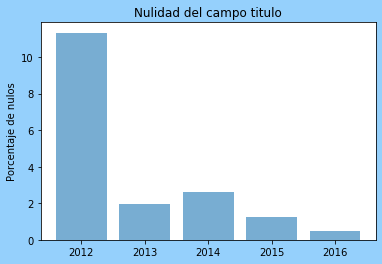

In [11]:
ds = pct_nulos_por_anio_cat

objects = ds['anio']
y_pos = np.arange(len(objects))
performance = ds['titulo']

fig = plt.figure()
fig.patch.set_facecolor('xkcd:light blue')

plt.bar(y_pos, performance, align='center', alpha=0.6)
plt.xticks(y_pos, objects)
plt.ylabel('Porcentaje de nulos')
plt.title('Nulidad del campo titulo')
plt.show()



/home/lorenzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


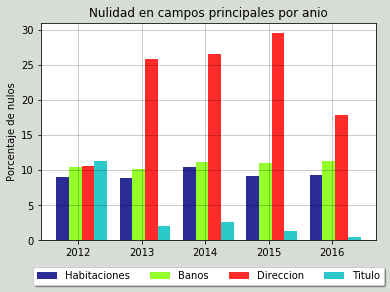

In [12]:
ds = pct_nulos_por_anio_cat

import numpy as np
import matplotlib.pyplot as plt

data = [ds['titulo'], ds['habitaciones'], ds['banos'], ds['direccion']]
objects = ds['anio']

fig = plt.figure()
fig.patch.set_facecolor('xkcd:light grey')
plt.grid(color='black', linestyle='-', linewidth=1, alpha = 0.2)

X = np.arange(5)

plt.ylabel('Porcentaje de nulos')
plt.title('Nulidad en campos principales por anio')

plt.bar(X + 0.00, data[1], color = 'navy', alpha = 0.83 ,width = 0.20, label='Habitaciones')
plt.bar(X + 0.20, data[2], color = 'chartreuse', alpha = 0.83 , width = 0.20, label='Banos')
plt.bar(X + 0.40, data[3], color = 'r', alpha = 0.83 , width = 0.20, label='Direccion')
plt.bar(X + 0.60, data[0], color = 'c', alpha = 0.83 ,width = 0.20, label='Titulo')

plt.xticks(X+0.25, objects)


ax = plt.subplot(111)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=5)
plt.show()

/home/lorenzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


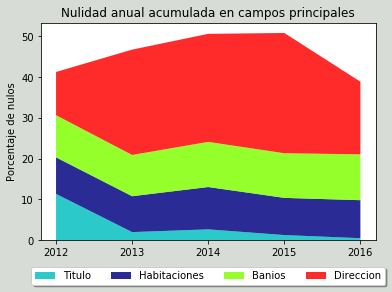

In [13]:
# --- FORMAT 1

ds = pct_nulos_por_anio_cat 
    
# Your x and y axis
data = [ds['titulo'], ds['habitaciones'], ds['banos'], ds['direccion']]# ds['metrostotales']]
years = ['2012','2013','2014','2015','2016']#ds['anio']

fondo = plt.figure()
fondo.patch.set_facecolor('xkcd:light grey')

pal = ['c', 'navy', 'chartreuse', 'r']

plt.stackplot(years, data, colors = pal, alpha = 0.83,
              labels=['Titulo','Habitaciones','Banios', 'Direccion', 'Metros Totales'])

plt.ylabel('Porcentaje de nulos')
plt.title('Nulidad anual acumulada en campos principales')


ax = plt.subplot(111)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=5)

plt.show()

In [14]:
a = [[-114.742783,18.32278],[-114.789726,18.318054],[-114.796402,18.318886],[-114.800568,18.32166],[-114.802513,18.326664],[-114.80307,18.332775],[-114.796402,18.339996],[-114.78389,18.34861],[-114.778633,18.350555],[-114.754181,18.354164],[-114.723892,18.353333],[-114.721123,18.34916],[-114.720573,18.342777],[-114.721947,18.337498],[-114.725281,18.333332],[-114.732513,18.326664],[-114.736954,18.324165],[-114.742783,18.32278],[-87.372787,18.400276],[-87.37695,18.39917],[-87.35028,18.43166],[-87.34112,18.44361],[-87.33862,18.44833],[-87.33417,18.465275],[-87.33139,18.48389],[-87.331116,18.490555],[-87.33168,18.503052],[-87.321945,18.495831],[-87.32167,18.469719],[-87.32695,18.453331],[-87.33168,18.443886],[-87.33778,18.436108],[-87.36528,18.406944],[-87.372787,18.400276],[-87.251678,18.641388],[-87.259445,18.62778],[-87.25334,18.653053],[-87.253067,18.679722],[-87.25528,18.69083],[-87.25723,18.695831],[-87.26279,18.704166],[-87.264725,18.709164],[-87.265015,18.733887],[-87.26195,18.733608],[-87.25473,18.718887],[-87.24667,18.689163],[-87.24501,18.677498],[-87.246399,18.664444],[-87.251678,18.641388],[-91.828613,18.639164],[-91.83446,18.638054],[-91.84029,18.639442],[-91.843338,18.64361],[-91.84529,18.65528],[-91.84195,18.659443],[-91.833344,18.664719],[-91.80972,18.676666],[-91.64612,18.753609],[-91.565002,18.785831],[-91.55334,18.78833],[-91.53946,18.788609],[-91.52612,18.775276],[-91.52389,18.770554],[-91.52196,18.765831],[-91.521118,18.759441],[-91.52139,18.752777],[-91.524445,18.748608],[-91.571121,18.73638],[-91.80112,18.644444],[-91.828613,18.639164],[-110.926117,18.721107],[-110.975014,18.71611],[-110.99556,18.734997],[-111.003342,18.741386],[-111.017227,18.749165],[-111.029449,18.751663],[-111.051117,18.752777],[-111.0625,18.756107],[-111.065842,18.75972],[-111.071404,18.76833],[-111.073059,18.77333],[-111.073624,18.779442],[-111.056396,18.812222],[-111.050842,18.82083],[-111.003342,18.864998],[-110.998062,18.867496],[-110.987503,18.864719],[-110.983337,18.861942],[-110.951401,18.836941],[-110.939453,18.827499],[-110.921112,18.78305],[-110.917236,18.77333],[-110.909729,18.740833],[-110.910843,18.734722],[-110.917236,18.726109],[-110.921112,18.722775],[-110.926117,18.721107],[-110.78862,19.30805],[-110.830002,19.271111],[-110.835854,19.27138],[-110.838623,19.27583],[-110.83667,19.281109],[-110.813339,19.341663],[-110.809174,19.341389],[-110.800842,19.335552],[-110.797234,19.331944],[-110.792793,19.32278],[-110.788887,19.313053],[-110.78862,19.30805],[-86.732788,20.585552],[-86.791672,20.488609],[-86.88556,20.353886],[-86.93251,20.301666],[-86.94334,20.291111],[-86.94723,20.287777],[-86.97612,20.266388],[-86.98445,20.260555],[-86.99335,20.25555],[-87,20.256386],[-87.01668,20.29222],[-87.01779,20.297775],[-87.02139,20.325832],[-87.02251,20.338333],[-87.022781,20.351387],[-87.021118,20.385555],[-87.02,20.39167],[-87.01501,20.408054],[-87.00307,20.439163],[-86.995834,20.453331],[-86.97111,20.493332],[-86.938904,20.539444],[-86.93224,20.546665],[-86.91667,20.55972],[-86.9064,20.56361],[-86.900284,20.56444],[-86.89307,20.56444],[-86.8864,20.56333],[-86.87862,20.556942],[-86.86862,20.552219],[-86.840561,20.54361],[-86.834732,20.541943],[-86.8289,20.541664],[-86.793335,20.551109],[-86.78418,20.55611],[-86.77112,20.56472],[-86.75612,20.57777],[-86.74583,20.588886],[-86.74084,20.59083],[-86.735,20.590553],[-86.732788,20.585552],[-86.7014,21.19722],[-86.7014,21.193054],[-86.70668,21.195274],[-86.714447,21.20194],[-86.73639,21.23555],[-86.73889,21.239998],[-86.7514,21.269997],[-86.75279,21.275555],[-86.751678,21.281666],[-86.74918,21.28639],[-86.74417,21.285553],[-86.72917,21.25861],[-86.703339,21.20194],[-86.7014,21.19722],[-106.195557,21.255276],[-106.201683,21.254166],[-106.215561,21.254719],[-106.22139,21.25666],[-106.2314,21.261665],[-106.247787,21.273888],[-106.258621,21.28444],[-106.269447,21.294998],[-106.275558,21.303055],[-106.278061,21.31361],[-106.276947,21.31972],[-106.268341,21.332775],[-106.265007,21.33667],[-106.254997,21.340553],[-106.208893,21.34111],[-106.202217,21.34111],[-106.19751,21.338608],[-106.195557,21.333885],[-106.193069,21.267498],[-106.193619,21.260555],[-106.195557,21.255276],[-106.386673,21.42083],[-106.39917,21.41972],[-106.468338,21.426666],[-106.501953,21.43222],[-106.506668,21.434719],[-106.509171,21.438889],[-106.511124,21.443886],[-106.511398,21.450275],[-106.507507,21.459442],[-106.499451,21.473331],[-106.485573,21.49555],[-106.478897,21.50333],[-106.47168,21.51055],[-106.459732,21.512218],[-106.445557,21.511665],[-106.34639,21.503052],[-106.340561,21.501389],[-106.335564,21.49889],[-106.326134,21.474442],[-106.327217,21.468609],[-106.330566,21.464722],[-106.377228,21.425552],[-106.381393,21.422497],[-106.386673,21.42083],[-106.515007,21.51305],[-106.525009,21.509163],[-106.529449,21.51083],[-106.588898,21.540276],[-106.597229,21.546665],[-106.621078,21.565311],[-106.628342,21.572498],[-106.640839,21.613331],[-106.642792,21.624443],[-106.645844,21.688332],[-106.634171,21.694164],[-106.585564,21.715832],[-106.539726,21.695831],[-106.530006,21.69083],[-106.527237,21.68639],[-106.500839,21.619442],[-106.497787,21.596664],[-106.515007,21.51305],[-106.656403,21.752499],[-106.672234,21.739998],[-106.675293,21.74139],[-106.676964,21.746387],[-106.679733,21.756943],[-106.681122,21.781387],[-106.680557,21.796944],[-106.674728,21.813053],[-106.670563,21.816387],[-106.664726,21.81583],[-106.658623,21.80778],[-106.643623,21.76861],[-106.646393,21.764164],[-106.656403,21.752499],[-97.60779,21.736664],[-97.61334,21.735554],[-97.629181,21.742496],[-97.633057,21.745831],[-97.6514,21.763611],[-97.67418,21.790276],[-97.67639,21.79472],[-97.68056,21.809998],[-97.68584,21.84889],[-97.685562,21.859997],[-97.67639,21.855274],[-97.670288,21.847221],[-97.60028,21.750275],[-97.601395,21.744999],[-97.60362,21.739719],[-97.60779,21.736664],[-97.818893,22.682499],[-97.82445,22.68111],[-97.830841,22.69722],[-97.79945,22.756943],[-97.79668,22.761387],[-97.78418,22.774166],[-97.77779,22.766388],[-97.777237,22.76083],[-97.77834,22.753887],[-97.806396,22.69944],[-97.811676,22.68972],[-97.818893,22.682499],[-97.773056,22.791386],[-97.778061,22.789444],[-97.781113,22.793331],[-97.7825,22.798332],[-97.781403,22.804996],[-97.777237,22.816387],[-97.767227,22.828331],[-97.760284,22.834164],[-97.758621,22.830555],[-97.7614,22.817776],[-97.76668,22.799721],[-97.773056,22.791386],[-109.784447,24.134998],[-109.788353,24.13194],[-109.839447,24.148052],[-109.850014,24.15889],[-109.863068,24.174721],[-109.871399,24.1875],[-109.883057,24.21722],[-109.900558,24.267776],[-109.92334,24.333611],[-109.925003,24.342777],[-109.9189,24.364441],[-109.915558,24.368889],[-109.883347,24.329998],[-109.869171,24.309166],[-109.86084,24.29639],[-109.798607,24.19111],[-109.789459,24.172497],[-109.783623,24.157776],[-109.781403,24.14666],[-109.781952,24.139721],[-109.784447,24.134998],[-111.532501,24.378052],[-111.520279,24.369999],[-111.494743,24.351387],[-111.500839,24.350277],[-111.53862,24.365833],[-111.549728,24.36972],[-111.568893,24.373608],[-111.602783,24.375832],[-111.617233,24.375832],[-111.646393,24.368889],[-111.669724,24.365833],[-111.670288,24.371944],[-111.6689,24.385],[-111.666397,24.389721],[-111.660843,24.391388],[-111.616386,24.392776],[-111.585281,24.39222],[-111.53862,24.379719],[-111.532501,24.378052],[-111.705841,24.33166],[-111.708069,24.328331],[-111.732513,24.354164],[-111.743057,24.364998],[-111.756119,24.373886],[-111.835007,24.427498],[-111.935837,24.486942],[-112.00473,24.516109],[-112.009743,24.51833],[-112.014183,24.521385],[-112.016113,24.526386],[-112.016678,24.5325],[-111.8414,24.543888],[-111.836937,24.541111],[-111.700287,24.400276],[-111.694733,24.391666],[-111.695557,24.364719],[-111.703903,24.336941],[-111.705841,24.33166],[-110.328056,24.400833],[-110.335007,24.400555],[-110.345291,24.405],[-110.357788,24.433887],[-110.4039,24.563053],[-110.403061,24.575275],[-110.401947,24.579998],[-110.386398,24.585552],[-110.381119,24.587219],[-110.375,24.586941],[-110.368057,24.57972],[-110.300003,24.484444],[-110.299179,24.46167],[-110.309448,24.432777],[-110.311951,24.428055],[-110.328056,24.400833],[-110.536957,24.882221],[-110.5439,24.881943],[-110.55806,24.883331],[-110.580292,24.891388],[-110.63945,24.928333],[-110.64389,24.93111],[-110.706947,25.037777],[-110.708893,25.0425],[-110.708618,25.062496],[-110.708069,25.082497],[-110.706947,25.088608],[-110.705002,25.093887],[-110.699722,25.093052],[-110.696091,25.08884],[-110.666946,25.060276],[-110.641113,25.048611],[-110.629997,25.04472],[-110.623901,25.043053],[-110.603622,25.039719],[-110.588623,25.039165],[-110.578903,25.033886],[-110.573334,25.025276],[-110.530006,24.897221],[-110.530563,24.890274],[-110.532227,24.88472],[-110.536957,24.882221],[-112.046112,24.51916],[-112.052231,24.518055],[-112.064178,24.521385],[-112.069168,24.52361],[-112.074448,24.52611],[-112.087509,24.53472],[-112.156113,24.629166],[-112.179169,24.662498],[-112.181122,24.667221],[-112.182243,24.679722],[-112.176682,24.68166],[-112.170013,24.681942],[-112.157501,24.691109],[-112.1539,24.701942],[-112.153343,24.708885],[-112.155006,24.733608],[-112.157501,24.74472],[-112.161667,24.75444],[-112.180557,24.78416],[-112.18779,24.79139],[-112.198059,24.79583],[-112.219727,24.80444],[-112.225571,24.80611],[-112.24501,24.809444],[-112.252792,24.809998],[-112.211937,24.98416],[-112.198624,25.02194],[-112.151398,25.176666],[-112.146118,25.200554],[-112.144997,25.206665],[-112.133621,25.281109],[-112.129463,25.272778],[-112.125839,25.25611],[-112.126106,25.236111],[-112.127228,25.23],[-112.134453,25.193886],[-112.139717,25.177776],[-112.142227,25.17305],[-112.156113,25.14333],[-112.172234,25.079998],[-112.175293,25.061665],[-112.202507,24.871109],[-112.203339,24.85722],[-112.202507,24.844997],[-112.198624,24.828331],[-112.194733,24.818607],[-112.171112,24.791943],[-112.0439,24.54472],[-112.041946,24.53972],[-112.040283,24.528053]]
b = [[-112.042236,24.5225],[-112.046112,24.51916],[-108.842789,25.428608],[-108.81279,25.413055],[-108.805847,25.405552],[-108.78862,25.380554],[-108.785843,25.37611],[-108.789169,25.372219],[-108.794724,25.37055],[-108.900009,25.41639],[-108.921402,25.425278],[-108.927513,25.426941],[-108.935013,25.427498],[-108.960281,25.424164],[-108.981117,25.423332],[-108.988617,25.42388],[-109.001404,25.426666],[-109.005836,25.429722],[-109.009171,25.433331],[-109.011124,25.438332],[-109.009453,25.44167],[-108.997787,25.444443],[-108.977226,25.445274],[-108.891953,25.44139],[-108.884453,25.44083],[-108.865013,25.43694],[-108.847778,25.430832],[-108.842789,25.428608],[-110.796951,25.594997],[-110.803886,25.594719],[-110.80751,25.598331],[-110.820847,25.626389],[-110.825287,25.6425],[-110.824448,25.656109],[-110.819168,25.679996],[-110.814728,25.689999],[-110.811401,25.693886],[-110.808327,25.695831],[-110.80307,25.693607],[-110.800293,25.689163],[-110.795837,25.673332],[-110.791672,25.64333],[-110.78862,25.60833],[-110.788887,25.60139],[-110.791672,25.59666],[-110.796951,25.594997],[-111.19751,25.844997],[-111.206123,25.802776],[-111.223343,25.848888],[-111.193336,26.033607],[-111.191391,26.038887],[-111.152237,26.06528],[-111.146957,26.067219],[-111.092789,26.074718],[-111.08667,26.074444],[-111.083069,26.070831],[-111.081123,26.06583],[-111.08223,26.05972],[-111.099457,26.004444],[-111.138901,25.982777],[-111.176392,25.90361],[-111.178337,25.898331],[-111.19751,25.844997],[-109.948898,27.024441],[-109.949448,27.017498],[-110.007782,27.074997],[-110.029449,27.083611],[-110.033073,27.08722],[-110.034447,27.091389],[-110.032791,27.092777],[-110.01973,27.091389],[-110.001678,27.086388],[-109.99556,27.084442],[-109.9814,27.076385],[-109.974167,27.068886],[-109.953903,27.039719],[-109.950012,27.029999],[-109.948898,27.024441],[-110.546112,27.309998],[-110.525848,27.30139],[-110.552513,27.306942],[-110.558617,27.308609],[-110.580292,27.317219],[-110.584732,27.32027],[-110.591949,27.3275],[-110.597504,27.336109],[-110.600853,27.346386],[-110.602509,27.35833],[-110.602783,27.377499],[-110.600281,27.389721],[-110.59668,27.400555],[-110.590286,27.415276],[-110.589737,27.410275],[-110.590843,27.391388],[-110.589447,27.366386],[-110.576401,27.331387],[-110.574173,27.326664],[-110.570557,27.323055],[-110.551392,27.3125],[-110.546112,27.309998],[-114.220001,27.738331],[-114.223068,27.734444],[-114.276672,27.753609],[-114.281113,27.756664],[-114.313606,27.78],[-114.324173,27.811108],[-114.323898,27.816666],[-114.320007,27.82],[-114.291397,27.835552],[-114.280838,27.831387],[-114.259453,27.822498],[-114.24501,27.81444],[-114.241119,27.810833],[-114.239182,27.80611],[-114.219727,27.742496],[-114.220001,27.738331],[-115.173889,28.027496],[-115.179459,28.024719],[-115.263344,28.072498],[-115.310013,28.100277],[-115.326683,28.138332],[-115.321953,28.14111],[-115.306122,28.154442],[-115.298889,28.16166],[-115.263344,28.20611],[-115.254463,28.218887],[-115.249733,28.228333],[-115.249451,28.235275],[-115.250839,28.240555],[-115.264717,28.269165],[-115.278343,28.304165],[-115.280006,28.309719],[-115.280563,28.31583],[-115.278633,28.328331],[-115.266113,28.351944],[-115.256668,28.363888],[-115.251678,28.366665],[-115.240837,28.370552],[-115.22612,28.369442],[-115.220573,28.367222],[-115.216949,28.363888],[-115.210854,28.355553],[-115.178886,28.308887],[-115.146118,28.17889],[-115.143066,28.15472],[-115.168327,28.03611],[-115.170013,28.03083],[-115.173889,28.027496],[-112.76001,28.593609],[-112.770279,28.589165],[-112.792236,28.616108],[-112.807243,28.630276],[-112.811951,28.633331],[-112.834732,28.640831],[-112.863068,28.65083],[-112.885834,28.683887],[-112.871117,28.682499],[-112.853348,28.677219],[-112.841949,28.673332],[-112.837227,28.67055],[-112.819168,28.658886],[-112.796402,28.64416],[-112.753067,28.60722],[-112.753342,28.601665],[-112.76001,28.593609],[-112.58168,28.670277],[-112.588623,28.669998],[-112.59639,28.670277],[-112.603622,28.727219],[-112.600281,28.731388],[-112.592216,28.737778],[-112.58667,28.739719],[-112.579727,28.739998],[-112.545563,28.737499],[-112.540848,28.735832],[-112.539459,28.730274],[-112.541946,28.696941],[-112.544167,28.684719],[-112.546112,28.679165],[-112.550842,28.676666],[-112.568893,28.672497],[-112.58168,28.670277],[-118.289169,28.881664],[-118.302231,28.881107],[-118.304459,28.91722],[-118.302231,28.919441],[-118.305847,28.936386],[-118.313606,28.969166],[-118.315292,28.97472],[-118.332779,29.023331],[-118.337509,29.032776],[-118.347504,29.05139],[-118.355293,29.058331],[-118.38501,29.07333],[-118.392792,29.080276],[-118.400558,29.093887],[-118.404167,29.147778],[-118.404167,29.153332],[-118.389183,29.173054],[-118.381393,29.179996],[-118.376678,29.182499],[-118.365013,29.18611],[-118.342789,29.189999],[-118.310013,29.195274],[-118.303886,29.193886],[-118.300568,29.191109],[-118.249733,29.074718],[-118.24057,29.041943],[-118.238342,29.030277],[-118.237228,28.953331],[-118.238068,28.94694],[-118.243622,28.924442],[-118.245827,28.91972],[-118.263344,28.886944],[-118.268066,28.88361],[-118.289169,28.881664],[-112.261948,28.773331],[-112.296402,28.75639],[-112.304169,28.756664],[-112.383347,28.778332],[-112.445847,28.806664],[-112.536392,28.85611],[-112.540848,28.858887],[-112.550003,28.864719],[-112.564178,28.87833],[-112.563057,28.883888],[-112.477783,29.147778],[-112.475853,29.153332],[-112.463058,29.176666],[-112.456947,29.18611],[-112.449722,29.193054],[-112.444733,29.195831],[-112.356949,29.23],[-112.34584,29.233608],[-112.290009,29.237499],[-112.266403,29.22222],[-112.212227,29.064163],[-112.202789,29.032219],[-112.200287,28.995277],[-112.200844,28.981667],[-112.203056,28.969444],[-112.248062,28.78167],[-112.252228,28.778332],[-112.261948,28.773331],[-113.135559,29.019722],[-113.139717,29.01778],[-113.18251,29.035553],[-113.207779,29.04805],[-113.2314,29.061943],[-113.24057,29.067776],[-113.357224,29.17083],[-113.410568,29.219719],[-113.525009,29.344997],[-113.592216,29.425831],[-113.598068,29.434166],[-113.600281,29.439163],[-113.600571,29.452221],[-113.588623,29.583611],[-113.585281,29.586109],[-113.580566,29.5875],[-113.575287,29.586666],[-113.527786,29.57194],[-113.50029,29.557499],[-113.469727,29.535831],[-113.40918,29.486111],[-113.405289,29.482498],[-113.396667,29.469997],[-113.373611,29.422775],[-113.365013,29.40333],[-113.36528,29.39666],[-113.366959,29.391109],[-113.37056,29.38028],[-113.376678,29.371666],[-113.380836,29.361664],[-113.384743,29.343887],[-113.384171,29.324718],[-113.381958,29.32],[-113.371117,29.315552],[-113.365013,29.313889],[-113.310013,29.300552],[-113.276398,29.298611],[-113.260834,29.29805],[-113.195847,29.228333],[-113.190567,29.15361],[-113.189453,29.141109],[-113.186951,29.13028],[-113.167793,29.086388],[-113.161118,29.078609],[-113.156403,29.075832],[-113.144997,29.071941],[-113.126678,29.063889],[-113.124451,29.058887],[-113.124733,29.052219],[-113.126953,29.039719],[-113.130569,29.02916],[-113.135559,29.019722],[-114.650848,31.69055],[-114.651123,31.685276],[-114.706123,31.685833],[-114.713348,31.68694],[-114.740837,31.697777],[-114.763634,31.712498],[-114.775284,31.723053],[-114.778343,31.72694],[-114.781403,31.73111],[-114.788887,31.744999],[-114.791672,31.756107],[-114.79306,31.781109],[-114.79306,31.787777],[-114.790283,31.799442],[-114.784447,31.80139],[-114.777237,31.800278],[-114.764717,31.797497],[-114.754463,31.7925],[-114.74501,31.786663],[-114.679733,31.73361],[-114.664459,31.719444],[-114.655289,31.706944],[-114.651672,31.69694],[-114.650848,31.69055],[-113.052887,31.971069],[-112.867279,31.91341],[-112.5,31.79837],[-112.299438,31.73555],[-111.946381,31.623608],[-111.417511,31.454166],[-111.045837,31.333054],[-110.311951,31.332775],[-110.24556,31.332775],[-109.879181,31.332775],[-109.512222,31.333332],[-109.058929,31.332872],[-109.047363,31.332603],[-109.046661,31.333332],[-108.83194,31.332632],[-108.81665,31.33317],[-108.778633,31.332775],[-108.208344,31.333054],[-108.207779,31.366386],[-108.208618,31.433331],[-108.207779,31.532776],[-108.208618,31.599442],[-108.207779,31.69944],[-108.208618,31.783333],[-108.175003,31.783886],[-107.90834,31.783054],[-107.708069,31.783886],[-107.608063,31.783333],[-107.575012,31.783886],[-107.507782,31.783333],[-107.441391,31.783886],[-107.375,31.783333],[-107.341133,31.783886],[-107.274727,31.783333],[-107.241959,31.783886],[-107.174728,31.783333],[-107.141678,31.783886],[-107.075287,31.783333],[-106.608337,31.783607],[-106.548889,31.782776],[-106.530243,31.781326],[-106.522881,31.78075],[-106.500839,31.76083],[-106.491959,31.75333],[-106.460007,31.750275],[-106.439178,31.751663],[-106.419724,31.754166],[-106.413345,31.753887],[-106.400848,31.750275],[-106.390839,31.74472],[-106.335846,31.68944],[-106.332779,31.685276],[-106.303345,31.637497],[-106.289169,31.5975],[-106.275009,31.56361],[-106.269455,31.554996],[-106.214447,31.475277],[-106.205292,31.469166],[-106.143616,31.43194],[-106.072235,31.405277],[-106.053619,31.399719],[-106.014725,31.396111],[-106.008621,31.394444],[-105.972778,31.36972],[-105.858063,31.282497],[-105.841949,31.269165],[-105.827515,31.254444],[-105.789734,31.212498],[-105.78418,31.203888],[-105.776672,31.184166],[-105.773895,31.179722],[-105.770279,31.176109],[-105.765839,31.173054],[-105.710007,31.14416],[-105.602234,31.083054],[-105.597778,31.08],[-105.584457,31.06472],[-105.57695,31.051109],[-105.541397,30.996387],[-105.494736,30.949718],[-105.486679,30.943054],[-105.393066,30.865833],[-105.261398,30.797222],[-105.247223,30.796108],[-105.242233,30.798332],[-105.235001,30.805832],[-105.227783,30.80611],[-105.220001,30.805275],[-105.207504,30.801666],[-105.169449,30.77861],[-105.125,30.749722],[-105.061951,30.694164],[-104.990845,30.632221],[-104.936951,30.609165],[-104.93251,30.60611],[-104.900558,30.57278],[-104.892502,30.55972],[-104.87973,30.524998],[-104.865005,30.466389],[-104.822235,30.38611],[-104.776947,30.318054],[-104.705566,30.23333]]
c = [[-104.682236,30.187496],[-104.675003,30.167774],[-104.677505,30.111111],[-104.678894,30.105],[-104.683334,30.094444],[-104.699173,30.06583],[-104.703613,30.054996],[-104.703339,30.04888],[-104.695007,30.004997],[-104.680283,29.945553],[-104.675842,29.936386],[-104.543625,29.674721],[-104.540009,29.671108],[-104.453339,29.595833],[-104.419174,29.569443],[-104.340836,29.525555],[-104.335281,29.524441],[-104.331116,29.5275],[-104.321121,29.532219],[-104.314728,29.533054],[-104.300003,29.53083],[-104.287781,29.527222],[-104.282501,29.524719],[-104.252792,29.508331],[-104.228348,29.494442],[-104.205002,29.479443],[-104.205566,29.460278],[-104.203064,29.45583],[-104.196121,29.44833],[-104.169724,29.422775],[-104.080841,29.355274],[-104.063614,29.3425],[-104.045288,29.33083],[-104.023621,29.32111],[-103.975006,29.305832],[-103.889175,29.285831],[-103.73584,29.199165],[-103.531403,29.12611],[-103.485001,29.088886],[-103.461945,29.073055],[-103.401123,29.036388],[-103.375,29.023609],[-103.299728,28.998055],[-103.292786,28.996666],[-103.290871,28.99652],[-103.180008,28.98805],[-103.166397,28.985275],[-103.154175,28.98139],[-103.051956,29.094166],[-102.955002,29.183052],[-102.895844,29.254166],[-102.85112,29.352219],[-102.804764,29.47408],[-102.670288,29.742775],[-102.560837,29.767776],[-102.499725,29.78167],[-102.492783,29.78167],[-102.35556,29.850555],[-102.311111,29.887218],[-102.305847,29.889442],[-102.298065,29.888611],[-102.292236,29.886665],[-102.263336,29.86944],[-102.259171,29.866386],[-102.227783,29.847221],[-102.121948,29.810555],[-102.097504,29.802776],[-102.076675,29.798611],[-102.068893,29.797775],[-102.054733,29.797775],[-102.041672,29.799164],[-101.990845,29.805832],[-101.892227,29.80611],[-101.825836,29.804722],[-101.774734,29.796665],[-101.74501,29.788887],[-101.70668,29.778053],[-101.632233,29.766388],[-101.62529,29.766388],[-101.539169,29.771111],[-101.45668,29.772221],[-101.405014,29.772778],[-101.371948,29.70472],[-101.368347,29.694721],[-101.369446,29.688053],[-101.367676,29.682392],[-101.355835,29.660553],[-101.310837,29.615276],[-101.218613,29.540276],[-101.141678,29.491943],[-101.136398,29.489441],[-101.110573,29.4825],[-101.102783,29.481667],[-101.061401,29.473331],[-101.055283,29.471113],[-101.045013,29.465836],[-101.040001,29.46139],[-101.036995,29.457104],[-101.034157,29.453049],[-101.025284,29.43777],[-100.945557,29.353333],[-100.928345,29.34666],[-100.797791,29.26028],[-100.793625,29.257221],[-100.668335,29.113331],[-100.663345,29.10472],[-100.628067,28.998886],[-100.628342,28.99277],[-100.635284,28.961109],[-100.633621,28.95611],[-100.621948,28.933331],[-100.590561,28.894722],[-100.564453,28.863609],[-100.529449,28.827499],[-100.525284,28.818054],[-100.495834,28.740276],[-100.490845,28.725277],[-100.490005,28.719719],[-100.490601,28.717575],[-100.492783,28.706944],[-100.491959,28.701385],[-100.483612,28.682499],[-100.47612,28.669167],[-100.443893,28.626389],[-100.399445,28.57111],[-100.359177,28.51833],[-100.350845,28.49472],[-100.329453,28.431664],[-100.329727,28.419167],[-100.33168,28.405552],[-100.330841,28.395275],[-100.285004,28.285831],[-100.282501,28.281387],[-100.279175,28.277496],[-100.24028,28.242775],[-100.186401,28.197498],[-100.111389,28.166664],[-100.10556,28.164719],[-100.090836,28.162498],[-100.079727,28.157776],[-100.071396,28.151108],[-100.050842,28.116386],[-99.962234,27.98472],[-99.93501,27.961666],[-99.881668,27.906387],[-99.88,27.901386],[-99.87195,27.85555],[-99.86528,27.817497],[-99.862793,27.806942],[-99.85779,27.798054],[-99.835556,27.775276],[-99.83029,27.77333],[-99.8067,27.771748],[-99.79973,27.76861],[-99.79668,27.764721],[-99.787506,27.746387],[-99.785843,27.741386],[-99.78001,27.73305],[-99.775848,27.72972],[-99.76918,27.728333],[-99.762222,27.728333],[-99.75473,27.727219],[-99.74945,27.72472],[-99.74501,27.721386],[-99.73779,27.708054],[-99.73639,27.703053],[-99.728897,27.68972],[-99.722229,27.681942],[-99.7139,27.668938],[-99.6964,27.656944],[-99.65362,27.641388],[-99.617783,27.641388],[-99.61195,27.64278],[-99.604172,27.641941],[-99.59084,27.638885],[-99.54417,27.61083],[-99.530838,27.601665],[-99.52417,27.593887],[-99.505,27.570274],[-99.502792,27.56583],[-99.47362,27.479443],[-99.47278,27.473888],[-99.44334,27.258053],[-99.45862,27.046944],[-99.32695,26.87222],[-99.321121,26.869995],[-99.314453,26.86861],[-99.27724,26.863333],[-99.27112,26.861385],[-99.26807,26.857498],[-99.25334,26.83083],[-99.239731,26.803608],[-99.20056,26.714443],[-99.132507,26.526943],[-99.10474,26.434998],[-98.97557,26.40583],[-98.925293,26.39139],[-98.78418,26.34889],[-98.73001,26.314442],[-98.6964,26.292221],[-98.69473,26.28722],[-98.60474,26.256664],[-98.57834,26.25611],[-98.44473,26.226109],[-98.43501,26.220554],[-98.388062,26.191666],[-98.36139,26.15361],[-98.30528,26.109165],[-98.28612,26.097775],[-98.200012,26.062496],[-98.06639,26.03833],[-98.05389,26.039444],[-98.03334,26.047775],[-97.98251,26.058052],[-97.97696,26.059166],[-97.85112,26.06361],[-97.8439,26.06361],[-97.80334,26.058052],[-97.68224,26.038887],[-97.675568,26.03722],[-97.648056,26.029442],[-97.61446,26.004997],[-97.55945,25.951111],[-97.51889,25.90555],[-97.516678,25.90111],[-97.51112,25.89333],[-97.42557,25.845276],[-97.4189,25.843609],[-97.412231,25.84222],[-97.367233,25.839443],[-97.36223,25.840275],[-97.349457,25.848888],[-97.3439,25.858608],[-97.34279,25.86555],[-97.34529,25.888054],[-97.34807,25.898052],[-97.31529,25.919998],[-97.265289,25.94111],[-97.16084,25.96722],[-97.140739,25.966429],[-97.139175,25.961847],[-97.13806,25.956812],[-97.13695,25.93972],[-97.13806,25.926666],[-97.160278,25.772221],[-97.188614,25.67472],[-97.254456,25.51083],[-97.271118,25.474163],[-97.285568,25.44278],[-97.29056,25.432499],[-97.310562,25.399719],[-97.313614,25.395275],[-97.336121,25.365],[-97.388062,25.28944],[-97.44278,25.201664],[-97.45807,25.17055],[-97.474731,25.13389],[-97.50917,25.05389],[-97.5114,25.048611],[-97.51584,25.03722],[-97.58417,24.784721],[-97.609726,24.685555],[-97.651672,24.520275],[-97.676117,24.39583],[-97.680283,24.37028],[-97.688065,24.322498],[-97.69723,24.255833],[-97.71556,24.074997],[-97.722504,23.955276],[-97.72473,23.899166],[-97.72446,23.820831],[-97.740005,23.588886],[-97.754181,23.472775],[-97.76083,23.407497],[-97.763062,23.381664],[-97.76501,23.338055],[-97.7664,23.300831],[-97.76556,23.27083],[-97.761948,23.194721],[-97.75639,23.125832],[-97.749451,23.088333],[-97.743622,23.068054],[-97.741669,23.051109],[-97.74084,23.027496],[-97.74028,23.00361],[-97.74139,22.90583],[-97.74722,22.872776],[-97.75084,22.86055],[-97.755,22.84944],[-97.787437,22.815805],[-97.80585,22.77361],[-97.835007,22.73805],[-97.877228,22.655552],[-97.88473,22.632221],[-97.89029,22.606667],[-97.889725,22.60083],[-97.888062,22.595833],[-97.88501,22.591942],[-97.877228,22.585278],[-97.87222,22.582775],[-97.86584,22.581108],[-97.804169,22.328331],[-97.80278,22.32333],[-97.7975,22.308887],[-97.791397,22.29472],[-97.776871,22.268055],[-97.781403,22.20472],[-97.78195,22.192219],[-97.77917,22.157776],[-97.768616,22.116943],[-97.74335,22.061386],[-97.73668,22.04805],[-97.69917,21.97694],[-97.69667,21.9725],[-97.6414,21.88361],[-97.627502,21.863052],[-97.612503,21.843052],[-97.57251,21.79389],[-97.556122,21.775],[-97.5414,21.760277],[-97.53029,21.749722],[-97.51918,21.73917],[-97.40362,21.643608],[-97.34251,21.601109],[-97.334732,21.594444],[-97.32529,21.582775],[-97.31723,21.56416],[-97.31279,21.548885],[-97.313614,21.530277],[-97.316681,21.509998],[-97.319458,21.497219],[-97.32861,21.467777],[-97.3439,21.429722],[-97.40861,21.274998],[-97.41196,21.269722],[-97.416672,21.271111],[-97.462784,21.391388],[-97.47667,21.434166],[-97.474731,21.440277],[-97.466949,21.44666],[-97.46251,21.448887],[-97.4189,21.467777],[-97.39029,21.469444],[-97.386948,21.471943],[-97.371124,21.492496],[-97.36806,21.49694],[-97.366959,21.503887],[-97.36974,21.53805],[-97.37195,21.542774],[-97.375,21.546665],[-97.398056,21.567219],[-97.426682,21.583611],[-97.43556,21.589722],[-97.45917,21.609444],[-97.4664,21.616665],[-97.488068,21.638611],[-97.52278,21.67528],[-97.61723,21.78527],[-97.62028,21.789165],[-97.62584,21.797497],[-97.68249,21.915865],[-97.69675,21.955481],[-97.74223,22.012497],[-97.731674,21.989719],[-97.72278,21.959442],[-97.714172,21.92889],[-97.705841,21.8925],[-97.70334,21.869999],[-97.688614,21.773609],[-97.67389,21.686943],[-97.671951,21.676109],[-97.670288,21.671108],[-97.66667,21.66166],[-97.651672,21.62972],[-97.62056,21.56583],[-97.57751,21.49944],[-97.568069,21.487778],[-97.55556,21.478333],[-97.501114,21.42639],[-97.45473,21.319443],[-97.376678,21.14],[-97.355835,21.094166],[-97.33835,21.057499],[-97.29279,20.962498],[-97.249176,20.893887],[-97.214447,20.839722],[-97.211945,20.835278],[-97.200562,20.812775],[-97.1925,20.794441],[-97.178619,20.755554],[-97.17834,20.75],[-97.18224,20.748333],[-97.18834,20.747776],[-97.191681,20.744164],[-97.19417,20.738888],[-97.19278,20.727776],[-97.19,20.7175],[-97.18251,20.69861],[-97.17612,20.684998],[-97.171402,20.676109],[-97.14389,20.641109],[-97.085556,20.568886],[-97.058334,20.540276],[-96.78723,20.262775],[-96.74445,20.22555],[-96.67639,20.15722],[-96.67334,20.153332],[-96.578339,20.025276],[-96.480835,19.899166],[-96.460007,19.8775],[-96.44778,19.861664],[-96.44112,19.848331],[-96.407501,19.762218],[-96.39751,19.73305],[-96.395,19.716663],[-96.393616,19.699718],[-96.39473,19.68666],[-96.387787,19.631664],[-96.36751,19.549442],[-96.296402,19.34333],[-96.29417,19.338886],[-96.276947,19.31472],[-96.24501,19.288609],[-96.228058,19.276386],[-96.20917,19.265274],[-96.185013,19.251942],[-96.139725,19.22944],[-96.09584,19.129719],[-96.093338,19.11972],[-96.08446,19.101665],[-96.0739,19.090553],[-96.05612,19.072498],[-96.052505,19.069164],[-96.04861,19.06583],[-96.03946,19.06028],[-96.033066,19.058609],[-96.013062,19.05778],[-95.95862,18.988609],[-95.9364,18.92639],[-95.90834,18.879719],[-95.89917,18.845833],[-95.91139,18.825275],[-95.808899,18.746109],[-95.793335,18.743889],[-95.53334,18.711941],[-95.40668,18.702774],[-95.39418,18.703053],[-95.34668,18.706665],[-95.32362,18.709442],[-95.306396,18.711666],[-95.21918,18.711388],[-95.212784,18.711109],[-95.187225,18.70444],[-95.17723,18.699165],[-95.051392,18.61305],[-95.03946,18.597221],[-95.035568,18.58222],[-95.035278,18.576385],[-95.03168,18.566944],[-95.0289,18.563053],[-95.01889,18.55805],[-94.94473,18.53666],[-94.925293,18.53416],[-94.88667,18.533054],[-94.86139,18.532497],[-94.847778,18.531109],[-94.813904,18.526386],[-94.80223,18.522499],[-94.79306,18.51694],[-94.78473,18.510555],[-94.775848,18.501663],[-94.75696,18.451385],[-94.755569,18.43444],[-94.75334,18.429443],[-94.735565,18.393887],[-94.732788,18.39],[-94.57979,18.190331],[-94.56946,18.179996],[-94.56557,18.176666],[-94.541946,18.162498],[-94.531113,18.157776],[-94.512222,18.152775],[-94.478897,18.146664],[-94.45946,18.14583],[-94.41806,18.148888],[-94.2764,18.171665],[-94.25917,18.175831],[-94.16806,18.198608],[-94.1376,18.20887],[-94.015289,18.245277],[-93.88667,18.254166],[-93.88167,18.25194],[-93.87418,18.25194],[-93.854736,18.252499],[-93.799728,18.260555],[-93.7939,18.261944],[-93.78917,18.263885],[-93.58,18.352219],[-93.57362,18.359722],[-93.570282,18.407776],[-93.57333,18.410553],[-93.58389,18.41],[-93.60196,18.406666],[-93.61307,18.403332],[-93.764725,18.340553],[-93.76918,18.337776],[-93.772781,18.334442],[-93.781403,18.32222],[-93.785568,18.31944],[-93.80806,18.30778],[-93.84668,18.299164],[-93.849457,18.303333],[-93.843613,18.311665],[-93.82613,18.3225],[-93.780563,18.348331],[-93.59611,18.41972],[-93.57806,18.423054],[-93.45001,18.440552],[-93.42973,18.441666],[-93.18167,18.438889],[-93.170288,18.41111],[-93.17418,18.40361],[-93.17223,18.372776],[-93.170288,18.36805],[-93.13278,18.340275],[-93.12695,18.338886],[-93.092514,18.373333],[-93.089737,18.377499],[-93.088058,18.383053],[-93.087784,18.40361],[-92.955,18.43916],[-92.926117,18.445831],[-92.91528,18.449165],[-92.88473,18.46111],[-92.82278,18.496666],[-92.805283,18.5075],[-92.74695,18.554996],[-92.73584,18.564999],[-92.680008,18.517776],[-92.58862,18.623608],[-92.480453,18.65698],[-92.460007,18.664444],[-92.40529,18.68111],[-92.325562,18.68528],[-92.31834,18.68528],[-92.303894,18.684998],[-92.15306,18.69527],[-92.01334,18.72472],[-91.99501,18.727776],[-91.9814,18.728333],[-91.97557,18.726665],[-91.960556,18.720276],[-91.95195,18.714722],[-91.85861,18.62333],[-91.858063,18.617222],[-91.8589,18.611111],[-91.90117,18.593832],[-91.90301,18.591497],[-91.90568,18.58983],[-91.939842,18.594831],[-91.943008,18.596165],[-92.03445,18.59472],[-92.037231,18.590553],[-92.041397,18.569164],[-92.042511,18.550831],[-92.00084,18.535],[-91.99501,18.533607],[-91.98918,18.53333],[-91.95668,18.54333],[-91.95862,18.554996],[-91.96612,18.568054],[-91.97084,18.583885],[-91.97139,18.590275],[-91.966675,18.59222],[-91.96139,18.59],[-91.90323,18.554996],[-91.89206,18.547497],[-91.825562,18.495831],[-91.82501,18.489719],[-91.83168,18.475277],[-91.83389,18.470554],[-91.84445,18.452774],[-91.848068,18.449444],[-91.853897,18.441387],[-91.8564,18.436665],[-91.85722,18.430553],[-91.8564,18.42555],[-91.85445,18.42083],[-91.818893,18.38583],[-91.814728,18.383053],[-91.80945,18.380833],[-91.80334,18.379997],[-91.773621,18.445553],[-91.67973,18.449444],[-91.636948,18.443886],[-91.4989,18.435276],[-91.492508,18.435833],[-91.475006,18.43944],[-91.47446,18.443054],[-91.47528,18.455276],[-91.480835,18.486942],[-91.48195,18.492496],[-91.48695,18.493332],[-91.505,18.484722],[-91.4375,18.54111],[-91.311676,18.59222],[-91.18973,18.64416],[-91.18611,18.6475],[-91.183899,18.652222],[-91.185013,18.656387],[-91.26363,18.740833],[-91.28418,18.762497],[-91.29501,18.773052],[-91.30695,18.78222],[-91.31279,18.783886],[-91.31946,18.784443],[-91.325287,18.78333],[-91.329727,18.780552],[-91.33334,18.777222],[-91.33917,18.769165],[-91.34084,18.763611],[-91.343903,18.75972],[-91.349731,18.75972],[-91.36751,18.768887],[-91.37668,18.773888],[-91.38867,18.818054],[-91.39001,18.820219],[-91.385178,18.827887],[-91.364014,18.856722],[-91.361336,18.858387],[-91.357841,18.859055],[-91.35351,18.859055],[-91.33,18.893887],[-91.39212,18.856941],[-91.394783,18.85528],[-91.39779,18.853777],[-91.407951,18.850943],[-91.419281,18.849609],[-91.427612,18.850109],[-91.433952,18.852276],[-91.43362,18.855108],[-91.391617,18.902275],[-91.38945,18.904274],[-91.38495,18.908276],[-91.37428,18.91461],[-91.36295,18.920277],[-91.304733,18.95583],[-91.26001,18.974998],[-91.13473,19.029442],[-91.02167,19.10722],[-90.913071,19.182499],[-90.75667,19.31583],[-90.751114,19.324718],[-90.733612,19.356388],[-90.729736,19.366665],[-90.71474,19.47],[-90.71223,19.488331],[-90.699722,19.634998],[-90.701675,19.64666],[-90.70723,19.654999],[-90.714447,19.668888],[-90.714172,19.675831],[-90.71306,19.681942],[-90.68112,19.762218],[-90.672226,19.774441],[-90.652512,19.79722],[-90.6414,19.808052],[-90.60057,19.838055],[-90.579178,19.851944],[-90.5614,19.862499],[-90.535278,19.872219],[-90.531113,19.874722],[-90.52335,19.881386],[-90.505569,19.898888],[-90.4989,19.906387],[-90.45917,19.965832],[-90.454727,19.975277],[-90.453613,19.98139],[-90.46584,20.016109],[-90.48056,20.04305],[-90.49806,20.074444],[-90.5,20.079166],[-90.50056,20.085278],[-90.49695,20.194443],[-90.48807,20.30805],[-90.484726,20.549442],[-90.460281,20.7225],[-90.45862,20.727776],[-90.4539,20.737499],[-90.45084,20.741386],[-90.439453,20.751389],[-90.405563,20.78916],[-90.3925,20.804443],[-90.3864,20.812775],[-90.38362,20.816666],[-90.37973,20.82694],[-90.373367,20.845913],[-90.35583,20.888054],[-90.350281,20.90361],[-90.3389,20.941666],[-90.335556,20.965],[-90.33751,20.969997],[-90.34167,20.969997],[-90.34584,20.966663],[-90.35196,20.95166],[-90.37897,20.863232],[-90.38417,20.842777],[-90.38667,20.838055],[-90.41446,20.79472],[-90.41724,20.790833],[-90.42168,20.78805],[-90.4364,20.78167],[-90.44029,20.783886],[-90.438614,20.78916],[-90.418335,20.838055],[-90.40572,20.863232],[-90.38583,20.925831],[-90.375565,20.950832],[-90.35362,21.000553],[-90.34889,21.009998],[-90.339737,21.021942],[-90.33585,21.025276],[-90.32751,21.03139],[-90.27972,21.063053],[-90.239456,21.086666],[-90.1064,21.160275],[-89.91972,21.234997],[-89.86806,21.254997],[-89.82806,21.270275],[-89.805557,21.276665],[-89.77612,21.282497],[-89.70445,21.296387],[-89.501114,21.317497],[-89.33806,21.332775],[-89.31807,21.334164],[-89.24112,21.342777],[-89.1089,21.361385],[-89.09611,21.363331],[-88.843338,21.413609],[-88.71861,21.443886],[-88.708069,21.44778],[-88.703613,21.450275],[-88.68668,21.462776],[-88.64667,21.49361],[-88.63528,21.503609],[-88.622787,21.51972],[-88.618896,21.523052],[-88.60612,21.531387],[-88.60167,21.533886],[-88.591125,21.537777],[-88.579727,21.540833],[-88.4514,21.568886],[-88.42557,21.571388],[-88.36584,21.572777],[-88.35335,21.570274],[-88.3439,21.564999],[-88.321396,21.558052],[-88.30945,21.554996],[-88.30307,21.55416],[-88.271118,21.553608],[-88.26472,21.55416],[-88.09167,21.583054],[-88.08639,21.585],[-88.08862,21.58833],[-88.09418,21.589996],[-88.13223,21.596943],[-88.138901,21.59777],[-88.145844,21.59722],[-88.157501,21.595],[-88.19112,21.585831],[-88.196396,21.583885],[-88.20084,21.581387],[-88.207779,21.574165],[-88.213058,21.57222],[-88.23695,21.567497],[-88.24335,21.567219],[-88.24278,21.570553],[-88.224731,21.58083],[-88.183334,21.59722],[-88.156952,21.606667],[-88.13863,21.609444],[-88.11945,21.609997],[-87.99417,21.602776],[-87.965012,21.596386],[-87.713058,21.53833],[-87.70723,21.53666],[-87.703613,21.533054],[-87.70557,21.527775],[-87.70917,21.524441],[-87.71973,21.52083],[-87.725845,21.51972],[-87.733063,21.52],[-87.802505,21.532776],[-87.845,21.5425],[-87.855835,21.54639],[-87.85779,21.54583],[-87.84668,21.535831],[-87.80695,21.51722],[-87.75446,21.505554],[-87.74196,21.503052],[-87.676392,21.502777],[-87.652512,21.505833],[-87.60529,21.512218],[-87.53918,21.495457],[-87.476395,21.47639],[-87.32945,21.448055],[-87.24918,21.441387],[-87.20917,21.449444],[-87.193344,21.454998],[-87.156403,21.47472],[-87.148056,21.480553],[-87.141113,21.487778],[-87.13863,21.492496],[-87.135284,21.50333],[-87.13196,21.521664],[-87.12807,21.549164],[-87.129181,21.554722],[-87.13251,21.558052],[-87.145569,21.566944],[-87.152237,21.56778],[-87.17001,21.567219],[-87.1864,21.562496],[-87.19667,21.558609],[-87.20113,21.55611],[-87.21335,21.549164],[-87.22195,21.5425],[-87.240005,21.532219],[-87.256668,21.5275],[-87.396118,21.504166],[-87.401947,21.505833],[-87.410568,21.511665],[-87.414169,21.51527],[-87.41528,21.52083],[-87.41446,21.526943],[-87.40668,21.53333],[-87.37001,21.560833],[-87.33417,21.570274],[-87.32333,21.566387],[-87.31084,21.563889],[-87.297501,21.56194],[-87.27556,21.561108],[-87.26889,21.561665],[-87.24501,21.566109],[-87.234726,21.569721],[-87.15334,21.60222],[-87.143616,21.606667],[-87.07861,21.60611],[-87.05484,21.599541],[-87.04945,21.598053],[-87.027786,21.590275],[-87.007507,21.581108],[-87.00334,21.578331],[-86.89723,21.441387],[-86.89111,21.442497],[-86.87112,21.443886],[-86.837784,21.43555],[-86.832779,21.433331],[-86.828339,21.430275],[-86.820007,21.417774],[-86.81557,21.40861],[-86.81056,21.374722],[-86.80945,21.36222],[-86.811951,21.34333],[-86.82501,21.30611],[-86.82695,21.293888],[-86.8264,21.287498],[-86.814453,21.188889],[-86.81334,21.183331],[-86.8114,21.178608],[-86.80556,21.17],[-86.77779,21.153889],[-86.77278,21.151386],[-86.8264,20.987778],[-86.85278,20.928333],[-86.913071,20.80194],[-87.0675,20.614719],[-87.0714,20.611385],[-87.13473,20.568054],[-87.13945,20.56555],[-87.151947,20.564163],[-87.16167,20.55972],[-87.204453,20.52444],[-87.22639,20.503887],[-87.2764,20.439999],[-87.30667,20.399441],[-87.421112,20.230831],[-87.43001,20.214722],[-87.437225,20.200554],[-87.45334,20.166943],[-87.455,20.16166],[-87.47195,20.092777],[-87.472504,20.079166],[-87.47057,19.995277],[-87.469452,19.983055],[-87.468338,19.977219],[-87.461121,19.95722],[-87.45723,19.947498],[-87.451675,19.938889],[-87.44334,19.93305],[-87.44706,19.93441],[-87.44489,19.926109],[-87.443222,19.915609],[-87.444229,19.899611],[-87.4459,19.892776],[-87.46656,19.844109],[-87.469223,19.843275],[-87.469894,19.846775],[-87.47057,19.861942],[-87.47123,19.877275],[-87.469727,19.879276],[-87.4599,19.882111],[-87.454559,19.88527],[-87.451225,19.890444],[-87.449898,19.895275],[-87.448891,19.903111],[-87.448059,19.923775],[-87.450897,19.929108],[-87.47278,19.95833],[-87.47696,19.961109],[-87.48222,19.959442],[-87.48473,19.95472],[-87.48445,19.943054],[-87.47278,19.913609],[-87.47472,19.874722],[-87.475227,19.87105],[-87.47673,19.868221],[-87.49857,19.83905],[-87.50223,19.834221],[-87.50639,19.82989],[-87.51323,19.823887],[-87.51606,19.82239],[-87.531677,19.799164],[-87.535843,19.802219],[-87.53778,19.806942],[-87.538345,19.813332],[-87.54167,19.816944],[-87.54834,19.816387],[-87.57695,19.802498],[-87.585007,19.796665],[-87.657227,19.678333],[-87.663895,19.679443],[-87.731674,19.681389],[-87.73695,19.679443],[-87.738892,19.674721],[-87.740005,19.636944],[-87.738068,19.61222],[-87.735,19.60166],[-87.73029,19.592777],[-87.69139,19.56444],[-87.6664,19.547775],[-87.67029,19.509998],[-87.67001,19.505276],[-87.664169,19.50361],[-87.65834,19.50333],[-87.65224,19.504719],[-87.647232,19.506386],[-87.63583,19.517776],[-87.62946,19.53111],[-87.61696,19.547222],[-87.60806,19.55222],[-87.52667,19.584721],[-87.43445,19.618332],[-87.425,19.606941],[-87.42223,19.602776],[-87.414734,19.589443],[-87.412781,19.584442],[-87.41167,19.578888],[-87.426956,19.508888],[-87.42834,19.502777],[-87.438614,19.477776],[-87.448059,19.46555],[-87.46556,19.44722],[-87.47696,19.437222],[-87.522781,19.405552],[-87.531677,19.400276],[-87.55446,19.395],[-87.560287,19.393887],[-87.566956,19.39333],[-87.570557,19.395554],[-87.552231,19.39833],[-87.542511,19.402775],[-87.53946,19.40667],[-87.53639,19.42805],[-87.53696,19.432777],[-87.542511,19.434444],[-87.54861,19.433331],[-87.62195,19.4025],[-87.6264,19.399998],[-87.633347,19.3925],[-87.645569,19.376663],[-87.662506,19.351109],[-87.676392,19.318054],[-87.677505,19.311943],[-87.68806,19.252499],[-87.6875,19.247776],[-87.67584,19.23139],[-87.6689,19.224442],[-87.64612,19.211109],[-87.64029,19.210831],[-87.626953,19.218609],[-87.593338,19.255833],[-87.59084,19.260555],[-87.5889,19.272778],[-87.58473,19.289719],[-87.578339,19.298332],[-87.57223,19.303608],[-87.552231,19.316666],[-87.542511,19.32111],[-87.50667,19.327221],[-87.5,19.326385],[-87.49722,19.32333],[-87.48862,19.29139],[-87.54834,19.139442],[-87.593338,19.056664],[-87.59584,19.05194],[-87.597504,19.04639],[-87.61389,18.970276],[-87.617508,18.9525],[-87.61945,18.925831],[-87.62361,18.875832],[-87.65224,18.765],[-87.6564,18.754719],[-87.665558,18.742775],[-87.710556,18.69778],[-87.724731,18.677219],[-87.729736,18.66777],[-87.7314,18.66222],[-87.73334,18.65],[-87.73946,18.60611],[-87.748337,18.519997],[-87.755,18.444164],[-87.75917,18.412498],[-87.76556,18.40472],[-87.79085,18.372498],[-87.813904,18.339165],[-87.81946,18.330555],[-87.82806,18.310833],[-87.838058,18.27833],[-87.83917,18.272221],[-87.84112,18.25972],[-87.847504,18.19083],[-87.87167,18.293331],[-87.87584,18.327774],[-87.877792,18.332775],[-87.89307,18.364166],[-87.925568,18.420277],[-87.97362,18.448055],[-88.031403,18.47028],[-88.03639,18.4725],[-88.07333,18.49361],[-88.080841,18.51722],[-88.081955,18.521385],[-88.08057,18.526943],[-88.075012,18.535553],[-88.066956,18.541664],[-88.00667,18.66555],[-88.001953,18.675278],[-88.001114,18.681389],[-88.001953,18.781666],[-88.00307,18.78722],[-88.037506,18.869442],[-88.04195,18.866943],[-88.05917,18.855831],[-88.06306,18.852497],[-88.089172,18.814999],[-88.16112,18.73778],[-88.21779,18.699997],[-88.16945,18.677219],[-88.26723,18.513054],[-88.27917,18.496944],[-88.289169,18.487499],[-88.2995,18.482929],[-88.3439,18.48139],[-88.365005,18.48139],[-88.377792,18.482777],[-88.405441,18.489902],[-88.466202,18.488537],[-88.47131,18.486828],[-88.47986,18.48103],[-88.483948,18.477612],[-88.490433,18.4701],[-88.506393,18.447498],[-88.51695,18.430275],[-88.587708,18.296711],[-88.590439,18.284763],[-88.600021,18.23583],[-88.681122,18.185555],[-88.68167,18.183887],[-88.70445,18.109997],[-88.728058,18.054722],[-88.774078,17.988834],[-88.8414,17.903889],[-88.87204,17.907257],[-88.98251,17.965],[-88.984329,17.966648],[-88.9915,17.98064],[-89.0025,17.994164],[-89.00973,18.000832],[-89.01945,18.004997],[-89.02528,18.00639],[-89.035843,18.005833],[-89.07205,17.994976],[-89.11574,17.973816],[-89.127502,17.968052],[-89.143051,17.956066],[-89.14297,17.946074],[-89.141953,17.81889],[-89.43043,17.81972],[-89.742233,17.820831],[-90,17.820976],[-90.23834,17.82111],[-90.59084,17.82111],[-90.77779,17.820274],[-90.92168,17.82],[-90.979172,17.82],[-90.98242,17.820652],[-90.983063,17.81778],[-90.98361,17.584999],[-90.9839,17.25611],[-91.436951,17.2575],[-91.438065,17.244164],[-91.4375,17.241108],[-91.43445,17.233608],[-91.42834,17.22583],[-91.41945,17.22055],[-91.33223,17.188053],[-91.26973,17.13639],[-91.267227,17.131664],[-91.18445,17.035553],[-91.063614,16.924442],[-90.98668,16.896111],[-90.9489,16.889164],[-90.92473,16.836388],[-90.921112,16.82972],[-90.916672,16.826942],[-90.91389,16.826385],[-90.86667,16.81778],[-90.806122,16.805832],[-90.80334,16.804996],[-90.74861,16.75694],[-90.71428,16.72646],[-90.678894,16.675831],[-90.658066,16.644165],[-90.64418,16.595276],[-90.6414,16.566666],[-90.64445,16.56277],[-90.64667,16.558331],[-90.645569,16.522221],[-90.645,16.51916],[-90.60918,16.489166],[-90.5939,16.47666],[-90.587509,16.476109],[-90.545288,16.473331],[-90.505,16.468609],[-90.48611,16.461109],[-90.4064,16.41639],[-90.393341,16.401108],[-90.384445,16.376942],[-90.40445,16.33639],[-90.408615,16.333611],[-90.438614,16.307499],[-90.45668,16.260555],[-90.45946,16.252777],[-90.46139,16.203053],[-90.459732,16.19083],[-90.45668,16.18666],[-90.452515,16.183887],[-90.44417,16.181942],[-90.43445,16.1775],[-90.43056,16.174164],[-90.42778,16.170277],[-90.427505,16.1675],[-90.43167,16.13583],[-90.43251,16.129719],[-90.441956,16.08833],[-90.44762,16.078842],[-90.45084,16.074997],[-90.45671,16.07477],[-90.458069,16.074718],[-90.62584,16.075554],[-90.804459,16.075832],[-90.99155,16.07574],[-91.540009,16.075832],[-91.70418,16.075554],[-91.72917,16.074997],[-91.797501,15.961111],[-91.828613,15.908888],[-92.10794,15.4376],[-92.21139,15.26222],[-92.072197,15.085834],[-92.06584,15.07778],[-92.07251,15.059721],[-92.08667,15.03],[-92.09001,15.026388],[-92.09584,15.021944],[-92.104446,15.019444],[-92.114456,15.01861],[-92.149734,14.934721],[-92.18224,14.853611],[-92.18584,14.84361],[-92.18501,14.830276],[-92.183334,14.811943],[-92.18251,14.80917],[-92.169174,14.76861],[-92.15834,14.729443],[-92.15306,14.706388],[-92.15224,14.700277],[-92.15224,14.690277],[-92.15445,14.675833],[-92.18722,14.58833],[-92.21667,14.558054],[-92.23795,14.551992],[-92.24678,14.550547],[-92.25571,14.554973],[-92.289169,14.5875],[-92.38444,14.684166],[-92.527237,14.828609],[-92.555557,14.855833],[-92.58389,14.879999],[-92.60112,14.894165],[-92.63251,14.926109],[-92.696121,14.992498],[-92.753067,15.053333],[-92.80428,15.12778],[-92.81145,15.137444],[-92.81279,15.140278],[-92.813118,15.14394],[-92.81178,15.14678],[-92.80795,15.147277],[-92.77917,15.154722],[-92.775284,15.151943],[-92.77223,15.147778],[-92.76918,15.130554],[-92.75723,15.10111],[-92.755,15.096388],[-92.752502,15.092222],[-92.7489,15.08861],[-92.743896,15.08667],[-92.738892,15.087221],[-92.73973,15.091944],[-92.754181,15.13111],[-92.76723,15.166388],[-92.76918,15.17111],[-92.772781,15.174444],[-92.84557,15.208887],[-92.852509,15.209166],[-92.85806,15.207777],[-92.86668,15.206665],[-92.86668,15.203333],[-92.88945,15.212221],[-92.979736,15.262499],[-93.0825,15.34861],[-93.093063,15.358889],[-93.10918,15.377499],[-93.150009,15.4275],[-93.19417,15.48139],[-93.20529,15.490833],[-93.2139,15.496387],[-93.283066,15.540277],[-93.412231,15.641666],[-93.468903,15.690554],[-93.480011,15.700277],[-93.56834,15.773054],[-93.64917,15.830555],[-93.69862,15.865276],[-93.788895,15.922777],[-93.876114,16],[-93.93195,16.09417],[-93.945282,16.093609],[-94.02389,16.109165],[-94.07362,16.136944],[-94.08223,16.14222],[-94.08534,16.14558],[-94.11195,16.175278],[-94.21007,16.205332],[-94.2139,16.20483],[-94.2179,16.205332],[-94.25839,16.215332],[-94.267899,16.218664],[-94.273567,16.22166],[-94.34167,16.258053],[-94.352234,16.26833],[-94.36168,16.279999],[-94.363617,16.284721],[-94.36418,16.29083],[-94.368057,16.294441],[-94.39418,16.296665],[-94.4064,16.294441],[-94.415009,16.28916],[-94.42445,16.278889],[-94.438614,16.240555],[-94.43445,16.21722],[-94.43167,16.213055],[-94.41612,16.200554],[-94.378067,16.17639],[-94.336945,16.154442],[-94.331955,16.152222],[-94.31612,16.14666],[-94.277237,16.135555],[-94.27112,16.134163],[-94.26556,16.135555],[-94.265015,16.140553],[-94.27112,16.148052],[-94.281403,16.152222],[-94.32472,16.165276],[-94.32973,16.16722],[-94.33835,16.172775],[-94.34167,16.17639],[-94.33168,16.18055],[-94.298294,16.172997],[-94.242287,16.163332],[-94.235786,16.161331],[-94.22728,16.157166],[-94.181396,16.13944],[-94.17361,16.133053],[-94.170563,16.129166],[-94.171402,16.124165],[-94.176392,16.12222],[-94.182785,16.121666],[-94.181671,16.118889],[-94.17084,16.114719],[-94.16501,16.113331],[-94.129456,16.10611],[-94.092346,16.099815],[-94.087509,16.09861],[-94.07251,16.09222],[-94.068069,16.089443],[-94.06111,16.0825],[-94.05556,16.07444],[-94.047501,16.054443],[-94.057785,16.040833],[-94.06505,16.041496],[-94.08362,16.04361],[-94.094727,16.046387],[-94.235001,16.103886],[-94.374725,16.162777],[-94.39557,16.170277],[-94.44112,16.181389],[-94.477509,16.188332],[-94.6039,16.194721],[-94.68195,16.190552],[-94.70056,16.19083],[-94.714172,16.192219],[-94.72473,16.196663],[-94.72862,16.200275],[-94.730835,16.20472],[-94.729446,16.211388],[-94.726669,16.215832],[-94.722504,16.21861],[-94.71306,16.2225],[-94.69723,16.22639],[-94.686676,16.228611],[-94.65529,16.236111],[-94.631958,16.246109],[-94.61584,16.258053],[-94.58778,16.286663],[-94.58446,16.29055],[-94.578613,16.307499],[-94.577515,16.312775],[-94.57806,16.318333],[-94.58112,16.32222],[-94.59584,16.335831],[-94.609726,16.34417],[-94.655014,16.36055],[-94.66139,16.362221],[-94.667236,16.361942],[-94.67361,16.353886],[-94.68001,16.3375],[-94.72084,16.30611],[-94.78389,16.258053],[-94.78973,16.257774],[-94.79445,16.260555],[-94.79806,16.26388],[-94.80751,16.281109],[-94.808624,16.286388],[-94.80695,16.292221],[-94.80389,16.296665],[-94.791672,16.304996],[-94.777512,16.31111],[-94.77112,16.327221],[-94.773056,16.331944],[-94.80334,16.39194],[-94.80695,16.395275],[-94.83389,16.418331],[-94.83862,16.421108],[-94.8564,16.426666],[-94.86195,16.427498],[-94.905838,16.41166],[-94.91528,16.407776],[-95.030838,16.32222],[-95.063065,16.28583],[-95.065567,16.28083],[-95.06723,16.274719],[-95.065567,16.271111],[-95.0625,16.26722],[-95.05751,16.265],[-95.03946,16.25944],[-94.90529,16.23111],[-94.857788,16.215832],[-94.92418,16.214165],[-94.930008,16.213608],[-95.100006,16.18333],[-95.20639,16.15583],[-95.22029,16.14972],[-95.251114,16.133053],[-95.35918,16.05611],[-95.362503,16.052498],[-95.36835,16.04361],[-95.37195,16.031666],[-95.366394,16.013054],[-95.377502,16.003052],[-95.38501,15.996666],[-95.39307,15.99083],[-95.401947,15.986111],[-95.420288,15.978054],[-95.48279,15.961943],[-95.51668,15.957777],[-95.527237,15.955276],[-95.589447,15.93861],[-95.610001,15.93278],[-95.7164,15.901667],[-95.74667,15.8925],[-95.94446,15.818609],[-95.95807,15.811666],[-96.06279,15.75361],[-96.17361,15.695276],[-96.18195,15.69167],[-96.214447,15.685555],[-96.2639,15.677221],[-96.28639,15.674444],[-96.36584,15.675833],[-96.37973,15.67805],[-96.42389,15.688889],[-96.43611,15.68861],[-96.440292,15.68583],[-96.44751,15.679165],[-96.47612,15.64361],[-96.55778,15.656387],[-96.82779,15.723888],[-96.839447,15.727499],[-96.845001,15.729721],[-97.070282,15.853054],[-97.10306,15.877777],[-97.13,15.894722],[-97.14056,15.898888],[-97.19667,15.913332],[-97.2314,15.918333],[-97.52057,15.94528],[-97.63945,15.96],[-97.650284,15.958055],[-97.659729,15.953888],[-97.668335,15.94889],[-97.67418,15.948332],[-97.68834,15.950277],[-97.75473,15.960278],[-97.785,15.968611],[-97.80057,15.975555],[-97.81279,15.984999],[-97.839447,16.008053],[-97.860565,16.0275],[-97.93001,16.0825],[-98.090012,16.186108],[-98.12556,16.208885],[-98.215286,16.222775],[-98.39889,16.261387],[-98.41779,16.266109],[-98.446396,16.275555],[-98.53667,16.306942],[-98.55139,16.314442],[-98.554688,16.319344],[-98.55945,16.332775],[-98.56584,16.346107],[-98.571945,16.353886],[-98.585556,16.36805],[-98.59361,16.374722],[-98.61639,16.388054],[-98.653625,16.415833],[-98.66112,16.422222],[-98.70113,16.4725],[-98.70723,16.480274],[-98.72084,16.506664],[-98.72612,16.514999],[-98.735001,16.526665],[-98.751114,16.539165],[-98.75584,16.541943],[-98.782227,16.553055],[-99.036957,16.59694],[-99.233063,16.628887],[-99.44057,16.67222],[-99.537231,16.68166],[-99.55806,16.68444],[-99.67973,16.705555],[-99.69223,16.708332],[-99.733612,16.726665],[-99.74362,16.731388],[-99.84112,16.781666],[-99.849731,16.7875],[-99.85278,16.79139],[-99.854172,16.796387],[-99.851395,16.800831],[-99.84112,16.818054],[-99.85474,16.85083],[-99.86,16.859165],[-99.86778,16.86555],[-99.878067,16.870277],[-99.97945,16.90083],[-100.228058,16.98],[-100.284447,17.005554],[-100.321953,17.020554],[-100.449722,17.067219],[-100.511673,17.08833],[-100.678619,17.144444],[-100.788071,17.17944],[-100.806122,17.184444],[-100.888634,17.208611],[-100.910004,17.2175],[-101.011124,17.265274],[-101.047501,17.290833],[-101.051392,17.300278],[-101.060013,17.312222],[-101.066116,17.319721],[-101.069458,17.32361],[-101.086403,17.34166],[-101.104446,17.358887],[-101.135834,17.379166],[-101.266403,17.459721],[-101.3414,17.489719],[-101.445007,17.540833],[-101.577789,17.62833],[-101.633057,17.66694],[-101.640007,17.674164],[-101.640007,17.68027],[-101.642227,17.69083],[-101.649437,17.70417],[-101.657227,17.71666],[-101.672234,17.736111],[-101.787781,17.87611],[-101.796402,17.883331],[-101.812233,17.896111],[-101.825012,17.904999],[-101.898354,17.94833],[-101.921402,17.961941],[-101.950012,17.9775],[-101.955566,17.979443],[-101.993622,17.987778],[-102.007782,17.989441],[-102.029167,17.991943],[-102.047234,17.98889],[-102.06279,17.984444],[-102.071953,17.98],[-102.091949,17.965],[-102.099457,17.95833],[-102.119453,17.935555],[-102.135559,17.923611],[-102.144447,17.919167],[-102.150009,17.9175],[-102.170288,17.918331],[-102.181,17.92083],[-102.22168,17.941387],[-102.237503,17.94778],[-102.290558,17.963333],[-102.455841,18.011387],[-102.565002,18.0425],[-102.583893,18.046665],[-102.605011,18.04833],[-102.61084,18.0475],[-102.637512,18.04833],[-102.681396,18.050831],[-102.720291,18.059166],[-102.74501,18.06583],[-102.755836,18.069721],[-102.816391,18.091942],[-102.83223,18.09861],[-102.9039,18.13083],[-102.93251,18.146111],[-102.936401,18.149441],[-102.954727,18.160275],[-103.029449,18.189999],[-103.047234,18.195274],[-103.061401,18.19694],[-103.088898,18.19833],[-103.103348,18.199718],[-103.109734,18.201111],[-103.357513,18.272778],[-103.450012,18.31361],[-103.473892,18.326385],[-103.482788,18.332222],[-103.493057,18.342777],[-103.50029,18.35611],[-103.509171,18.38028],[-103.519447,18.403332],[-103.538887,18.438332],[-103.560837,18.477776],[-103.575844,18.497219],[-103.705566,18.650555],[-103.725014,18.673332],[-103.745483,18.688068],[-103.750839,18.69083],[-103.759453,18.696663],[-103.776398,18.708611],[-103.839737,18.766388],[-103.943619,18.85527],[-103.971947,18.87722],[-104.004463,18.89638],[-104.025284,18.905277],[-104.047234,18.913609],[-104.136948,18.944164],[-104.205292,18.966663],[-104.305557,19.00305],[-104.315002,19.008053],[-104.323334,19.014442],[-104.326401,19.018055],[-104.33139,19.026943],[-104.330566,19.039997],[-104.328613,19.04528],[-104.31723,19.06277],[-104.313904,19.074165],[-104.314728,19.080276],[-104.319733,19.089165],[-104.327789,19.095276],[-104.367783,19.10805],[-104.374451,19.109444],[-104.513062,19.12722],[-104.592422,19.14794],[-104.656952,19.166111],[-104.662781,19.168053],[-104.672501,19.173054],[-104.680557,19.179443],[-104.683617,19.183052],[-104.805847,19.251663],[-104.896667,19.283886],[-104.901398,19.28639],[-104.951683,19.315277],[-104.983612,19.339443],[-105.022507,19.37194],[-105.078613,19.49528],[-105.09584,19.55139],[-105.102509,19.564999],[-105.11557,19.58],[-105.119743,19.583054],[-105.169724,19.606941],[-105.203903,19.618053],[-105.214447,19.622498],[-105.266678,19.676109],[-105.269997,19.679722],[-105.299728,19.719719],[-105.302231,19.72389],[-105.304733,19.728333],[-105.315567,19.751389],[-105.321404,19.76555],[-105.326401,19.774441],[-105.33223,19.782497],[-105.386948,19.849998],[-105.410843,19.87611],[-105.418327,19.883053],[-105.430557,19.89222],[-105.43779,19.899166],[-105.441116,19.902775],[-105.456947,19.922222],[-105.497787,19.991108],[-105.515289,20.02166],[-105.527786,20.04389],[-105.542236,20.07694],[-105.547234,20.091942],[-105.548073,20.0975],[-105.595573,20.243332],[-105.662231,20.34972],[-105.674728,20.371666],[-105.676682,20.376389],[-105.680008,20.386387],[-105.681953,20.397778],[-105.678337,20.41805],[-105.676964,20.424164],[-105.673073,20.427219],[-105.626678,20.458332],[-105.613342,20.46611],[-105.599457,20.473331],[-105.590286,20.478054],[-105.560287,20.49],[-105.542511,20.492496],[-105.496674,20.494164],[-105.453613,20.491108],[-105.44751,20.49194],[-105.351959,20.513054],[-105.336121,20.518055],[-105.326683,20.522778],[-105.25029,20.56555],[-105.244171,20.57416],[-105.242233,20.579441],[-105.234177,20.615833],[-105.233612,20.628887],[-105.234451,20.634441],[-105.238068,20.644444],[-105.262222,20.694721],[-105.265556,20.69861],[-105.266891,20.699043],[-105.312233,20.757221],[-105.318893,20.764721],[-105.322777,20.767776],[-105.333344,20.772221],[-105.340012,20.773331],[-105.34668,20.773331],[-105.364464,20.770554],[-105.37001,20.769165],[-105.392502,20.756664],[-105.4039,20.75417],[-105.417236,20.75389],[-105.534729,20.779999],[-105.540558,20.78167],[-105.544449,20.785],[-105.541946,20.78944],[-105.531952,20.801109],[-105.318619,21.017498],[-105.307243,21.027775],[-105.295013,21.036942],[-105.289726,21.038609],[-105.268341,21.037498],[-105.262512,21.03833],[-105.257782,21.040554],[-105.246674,21.05555],[-105.241386,21.06472],[-105.232513,21.085278],[-105.225853,21.10805],[-105.224457,21.114166],[-105.213058,21.227776],[-105.213898,21.239441],[-105.228058,21.311665],[-105.189453,21.437496],[-105.242508,21.513885],[-105.249184,21.513611],[-105.273903,21.52],[-105.279716,21.521664],[-105.43306,21.604164],[-105.436401,21.607777],[-105.438057,21.612778],[-105.442497,21.634441],[-105.440567,21.655],[-105.44223,21.66],[-105.457779,21.698608],[-105.508621,21.791943],[-105.549179,21.860275],[-105.557793,21.87278],[-105.563606,21.880833],[-105.57695,21.89583],[-105.596123,21.912498],[-105.609451,21.927498],[-105.622223,21.943054],[-105.634743,21.958611],[-105.646393,21.97472],[-105.654167,21.987778],[-105.655838,21.992775],[-105.656403,22.01139],[-105.655563,22.05611],[-105.645569,22.13472],[-105.638901,22.186665],[-105.636398,22.213886],[-105.636673,22.232498],[-105.638062,22.25694],[-105.640289,22.28666],[-105.64418,22.315277],[-105.649727,22.342777],[-105.656677,22.362499],[-105.66362,22.376389],[-105.690842,22.43083],[-105.714577,22.468361],[-105.73056,22.513054],[-105.744743,22.54389],[-105.799179,22.63583],[-105.816963,22.660275],[-105.823898,22.667774],[-105.919724,22.758331],[-105.974167,22.798611],[-106.000839,22.81611],[-106.080002,22.88805],[-106.110291,22.921665],[-106.13945,22.956387],[-106.226669,23.053608],[-106.37001,23.178333],[-106.478622,23.326111],[-106.493347,23.354164],[-106.511398,23.384441],[-106.522507,23.401108],[-106.532791,23.4125],[-106.661667,23.523052],[-106.785004,23.629166],[-106.802231,23.647499],[-106.804733,23.651943],[-106.841133,23.72583],[-106.865837,23.776386],[-106.870293,23.785831],[-106.894997,23.836666],[-106.903633,23.84916],[-106.912231,23.86138],[-106.919167,23.86889],[-106.958344,23.902222],[-107.001106,23.94527],[-107.01918,23.963055],[-107.031113,23.973053],[-107.04306,23.982777],[-107.071121,23.999443],[-107.388634,24.22472],[-107.422501,24.252499],[-107.522507,24.328053],[-107.548073,24.34639],[-107.566116,24.35805],[-107.584732,24.36972],[-107.594177,24.374996],[-107.650009,24.401665],[-107.672195,24.422064],[-107.67836,24.425732],[-107.721863,24.453232],[-107.72686,24.456898],[-107.733696,24.463066],[-107.735359,24.465733],[-107.735863,24.469065],[-107.735527,24.47323],[-107.734032,24.475897],[-107.732025,24.477398],[-107.727531,24.477232],[-107.724022,24.476065],[-107.721359,24.474232],[-107.675758,24.446732],[-107.653061,24.431932],[-107.630959,24.431999],[-107.600952,24.42233],[-107.598114,24.423832],[-107.596626,24.426666],[-107.589951,24.44016],[-107.589119,24.44383],[-107.588791,24.447998],[-107.589462,24.451332],[-107.594948,24.46616],[-107.613449,24.509163],[-107.617287,24.517832],[-107.618958,24.52033],[-107.622452,24.521498],[-107.626457,24.522163],[-107.644127,24.523],[-107.651787,24.522331],[-107.655121,24.521332],[-107.65995,24.517498],[-107.661621,24.514664],[-107.662453,24.511],[-107.661293,24.508165],[-107.657288,24.50733],[-107.653954,24.508331],[-107.648285,24.511332],[-107.643456,24.515165],[-107.640121,24.516165],[-107.636452,24.515831],[-107.634956,24.513165],[-107.634293,24.509832],[-107.635948,24.50717],[-107.650955,24.49166],[-107.655289,24.487497],[-107.674957,24.481331],[-107.681458,24.479332],[-107.685448,24.479164],[-107.748947,24.50733],[-107.750122,24.510164],[-107.749954,24.521832],[-107.744453,24.52833],[-107.748901,24.537498],[-107.808327,24.587219],[-107.872787,24.613609],[-107.92778,24.63472],[-107.934723,24.63583],[-107.932243,24.627499],[-107.929733,24.623055],[-107.89418,24.586109],[-107.862228,24.559998],[-107.851959,24.554996],[-107.846123,24.553333],[-107.805283,24.53389],[-107.806671,24.527775],[-107.811401,24.525276],[-107.818069,24.525276],[-107.824173,24.526943],[-107.916397,24.582775],[-107.941963,24.601109],[-107.988617,24.641666],[-107.992233,24.645275],[-107.999184,24.6525],[-108.001953,24.656944],[-108.005569,24.666943],[-108.007782,24.67805],[-108.016678,24.734997],[-107.996948,24.75111],[-107.986679,24.949997],[-107.987503,24.956944],[-107.989464,24.961941],[-107.996399,24.969166],[-108.011948,24.982498],[-108.036011,24.993666],[-108.039169,24.99433],[-108.042511,24.993164],[-108.049728,24.98666],[-108.046112,24.957497],[-108.045013,24.95194],[-108.04306,24.946941],[-108.029716,24.925278],[-108.026672,24.914719],[-108.038071,24.84333],[-108.040558,24.83111],[-108.04306,24.826385],[-108.047234,24.82333],[-108.05278,24.821663],[-108.093903,24.818886],[-108.101387,24.819443],[-108.1064,24.821663],[-108.115013,24.82777],[-108.126404,24.838333],[-108.129181,24.8425],[-108.181396,24.936386],[-108.228622,25.0275],[-108.213898,25.031387],[-108.185287,24.989441],[-108.179169,24.98083],[-108.174179,24.978333],[-108.132782,24.972221],[-108.127502,24.9725],[-108.096313,25.01298],[-108.003067,25.000553],[-107.999733,25.004444],[-107.999733,25.01083],[-108.000839,25.016388],[-108.006393,25.031109],[-108.009171,25.03555],[-108.021393,25.051388],[-108.042511,25.073608],[-108.05806,25.086941],[-108.0625,25.089996],[-108.09584,25.10889],[-108.125839,25.123886],[-108.243057,25.159164],[-108.352509,25.16722],[-108.39418,25.141109],[-108.391403,25.194443],[-108.393623,25.20583],[-108.402786,25.224998],[-108.410843,25.238609],[-108.420563,25.250275],[-108.436951,25.263054],[-108.455841,25.273888],[-108.558327,25.31472],[-108.616669,25.339996],[-108.728622,25.396664],[-108.762222,25.43444],[-108.766113,25.485554],[-108.763344,25.49028],[-108.762787,25.49722],[-108.761398,25.534164],[-108.764183,25.538609],[-108.767792,25.54222],[-108.837784,25.56166],[-108.886673,25.563332],[-108.898903,25.561386],[-108.901398,25.556664],[-108.902786,25.550552],[-108.900009,25.546387],[-108.88945,25.535275],[-108.878067,25.525],[-108.876106,25.519997],[-108.877792,25.507221],[-108.881119,25.495552],[-108.886124,25.48],[-108.920013,25.45611],[-109.016403,25.458611],[-109.029449,25.459999],[-109.039726,25.464996],[-109.068336,25.48722],[-109.108902,25.526108],[-109.086731,25.536331],[-109.082733,25.540998],[-109.064224,25.561831],[-109.061401,25.56333],[-109.054398,25.564999],[-109.0504,25.565163],[-109.018234,25.560165],[-108.992233,25.566387],[-108.991119,25.560833],[-108.990837,25.554722],[-108.970291,25.564442],[-108.906952,25.633331],[-108.896957,25.645275],[-108.878342,25.67028],[-108.828903,25.775833],[-108.82695,25.78111],[-108.825287,25.794167],[-108.828056,25.798332],[-108.833069,25.800831],[-108.839172,25.802498],[-108.845291,25.801666],[-108.852783,25.79444],[-108.876404,25.74361],[-108.891403,25.707497],[-108.89418,25.702774],[-108.900848,25.695],[-108.905006,25.69194],[-109.025894,25.616665],[-109.042397,25.60866],[-109.049057,25.606665],[-109.071396,25.601332],[-109.082558,25.599499],[-109.136948,25.578053],[-109.140556,25.581944],[-109.143341,25.586109],[-109.151123,25.605831],[-109.156677,25.620552],[-109.166122,25.639721],[-109.172234,25.647778],[-109.30751,25.738331],[-109.366119,25.763054],[-109.373611,25.763611],[-109.379181,25.761944],[-109.383904,25.759441],[-109.388062,25.756107],[-109.4375,25.820274],[-109.443336,25.93972],[-109.44223,25.953331],[-109.434723,25.99694],[-109.430283,26.014442],[-109.424454,26.030552],[-109.419167,26.039997],[-109.402786,26.06444],[-109.305557,26.201664],[-109.291397,26.174721],[-109.291122,26.168331],[-109.290009,26.16278],[-109.288071,26.158054],[-109.285278,26.15361],[-109.279716,26.155277],[-109.275848,26.158607],[-109.270569,26.167774],[-109.229736,26.263054]]
d = [[-109.231667,26.31944],[-109.214737,26.339165],[-109.205292,26.344166],[-109.200012,26.343052],[-109.1689,26.328888],[-109.165283,26.325275],[-109.162514,26.320831],[-109.160172,26.304722],[-109.175293,26.264721],[-109.172501,26.260277],[-109.123062,26.224442],[-109.10112,26.209164],[-109.095573,26.211109],[-109.093613,26.216389],[-109.093903,26.2225],[-109.103897,26.28361],[-109.143723,26.338314],[-109.147781,26.352219],[-109.153633,26.36694],[-109.15834,26.376389],[-109.264717,26.51333],[-109.440002,26.7125],[-109.448624,26.718609],[-109.513344,26.762218],[-109.517502,26.765],[-109.524437,26.765],[-109.554169,26.750832],[-109.645279,26.69889],[-109.649437,26.695831],[-109.677231,26.672497],[-109.685013,26.673054],[-109.698624,26.675278],[-109.717506,26.679722],[-109.753891,26.69611],[-109.772507,26.707497],[-109.816681,26.745831],[-109.827507,26.757221],[-109.866669,26.82333],[-109.875557,26.84861],[-109.88028,26.870831],[-109.887512,26.910553],[-109.898354,26.97416],[-109.915848,27.044441],[-109.9189,27.054996],[-109.924454,27.06361],[-109.947243,27.09166],[-109.950844,27.095276],[-109.962509,27.105274],[-109.972229,27.110832],[-109.978348,27.1125],[-109.991959,27.114441],[-110.014183,27.116386],[-110.01889,27.116665],[-110.027786,27.111111],[-110.034447,27.103054],[-110.03862,27.099998],[-110.049454,27.096386],[-110.055847,27.095276],[-110.063339,27.095833],[-110.225014,27.136944],[-110.301964,27.16222],[-110.335007,27.18444],[-110.446404,27.31166],[-110.529716,27.371109],[-110.622223,27.601944],[-110.633347,27.632221],[-110.634743,27.637775],[-110.635834,27.656109],[-110.633347,27.66861],[-110.605293,27.7575],[-110.557793,27.832497],[-110.552231,27.833054],[-110.521667,27.838886],[-110.516113,27.84083],[-110.51001,27.849442],[-110.508057,27.854721],[-110.507782,27.861664],[-110.509743,27.866386],[-110.59668,27.8875],[-110.789459,27.916943],[-110.871674,27.842777],[-110.960854,27.907497],[-111.055847,27.949165],[-111.076683,27.940552],[-111.087784,27.936943],[-111.10112,27.935555],[-111.10556,27.938332],[-111.216133,28.035553],[-111.249733,28.06805],[-111.266403,28.087219],[-111.269447,28.091389],[-111.306396,28.14722],[-111.325562,28.177776],[-111.341949,28.203609],[-111.463348,28.374996],[-111.534729,28.40361],[-111.578903,28.420555],[-111.640556,28.443333],[-111.669724,28.452774],[-111.691116,28.461941],[-111.695557,28.464722],[-111.700562,28.47389],[-111.710854,28.498333],[-111.714172,28.508888],[-111.722229,28.52889],[-111.729446,28.543053],[-111.738068,28.555553],[-111.763344,28.58833],[-111.769997,28.596107],[-111.795837,28.621109],[-111.822243,28.63944],[-111.847504,28.658333],[-111.92778,28.731388],[-111.935287,28.738609],[-111.938057,28.743053],[-111.947243,28.76166],[-111.926117,28.777222],[-111.917236,28.783054],[-111.911667,28.785],[-111.915848,28.803608],[-112.037231,28.883888],[-112.115013,28.966389],[-112.15918,28.970276],[-112.164726,28.9725],[-112.176392,29.058609],[-112.189728,29.17472],[-112.196953,29.26028],[-112.201401,29.283054],[-112.210564,29.301941],[-112.2164,29.310276],[-112.227509,29.32111],[-112.23584,29.3275],[-112.246399,29.332222],[-112.251953,29.334442],[-112.258904,29.335278],[-112.28862,29.335278],[-112.326683,29.328609],[-112.33223,29.326664],[-112.396118,29.40972],[-112.390839,29.419167],[-112.386398,29.429165],[-112.379181,29.45083],[-112.375839,29.469166],[-112.375,29.482777],[-112.37529,29.495831],[-112.377228,29.500553],[-112.425568,29.554443],[-112.440567,29.569443],[-112.467789,29.5875],[-112.475281,29.594719],[-112.493896,29.61305],[-112.568069,29.701385],[-112.577789,29.713333],[-112.580566,29.7175],[-112.705841,29.921665],[-112.735573,29.971107],[-112.751678,30.046108],[-112.749451,30.135277],[-112.748901,30.161942],[-112.752792,30.19833],[-112.756119,30.208611],[-112.765556,30.227497],[-112.858063,30.402496],[-112.92807,30.491665],[-112.999451,30.573887],[-113.006119,30.58166],[-113.042511,30.631386],[-113.05751,30.652222],[-113.065567,30.665554],[-113.072777,30.679443],[-113.08139,30.698887],[-113.11528,30.802776],[-113.117233,30.814442],[-113.116119,30.820553],[-113.109451,30.842777],[-113.09584,30.879719],[-113.049454,31.053886],[-113.038887,31.093609],[-113.037781,31.09972],[-113.037231,31.113331],[-113.036957,31.151943],[-113.037781,31.164165],[-113.039169,31.16972],[-113.042236,31.173885],[-113.08667,31.227219],[-113.09668,31.23222],[-113.109177,31.23555],[-113.124451,31.235275],[-113.137222,31.23305],[-113.327789,31.260555],[-113.469177,31.282776],[-113.482513,31.285275],[-113.510834,31.29583],[-113.589737,31.33166],[-113.613617,31.34861],[-113.622223,31.390274],[-113.628616,31.424442],[-113.628891,31.437496],[-113.626106,31.448887],[-113.624733,31.46194],[-113.625839,31.47416],[-113.632233,31.488609],[-113.638344,31.49694],[-113.649727,31.5075],[-113.660004,31.512497],[-113.675568,31.519997],[-113.821953,31.58083],[-113.960007,31.660275],[-113.965561,31.662498],[-113.971123,31.66333],[-113.978622,31.656109],[-113.98056,31.650833],[-113.981949,31.572498],[-113.977226,31.57111],[-113.970001,31.571663],[-113.952217,31.575832],[-113.947777,31.573055],[-113.945557,31.568054],[-113.948059,31.563332],[-113.975571,31.532219],[-113.99057,31.517776],[-114.015839,31.500275],[-114.025848,31.494999],[-114.046677,31.492775],[-114.053619,31.492496],[-114.130836,31.495277],[-114.169724,31.504444],[-114.204178,31.516388],[-114.215286,31.520832],[-114.225281,31.52583],[-114.254997,31.541664],[-114.426964,31.641941],[-114.436111,31.647778],[-114.482224,31.677498],[-114.502502,31.694164],[-114.516113,31.709721],[-114.519997,31.713055],[-114.575287,31.754719],[-114.583893,31.76083],[-114.589447,31.763054],[-114.630569,31.76833],[-114.637222,31.76694],[-114.71167,31.783054],[-114.808617,31.82222],[-114.825012,31.835552],[-114.928886,31.903889],[-115.017242,31.95443],[-115.020569,31.963608],[-115.024437,31.96722],[-115.031677,31.96805],[-115.03418,31.96333],[-115.035278,31.957222],[-115.03389,31.951664],[-115.020569,31.916111],[-115.018341,31.911388],[-115.01445,31.907776],[-115,31.906109],[-114.987228,31.908607],[-114.980011,31.907776],[-114.968063,31.904163],[-114.949173,31.892776],[-114.940002,31.887218],[-114.931396,31.880833],[-114.923607,31.873886],[-114.916672,31.866108],[-114.820007,31.740276],[-114.786667,31.664165],[-114.779449,31.643608],[-114.782227,31.632221],[-114.785568,31.628052],[-114.796112,31.623608],[-114.808327,31.61389],[-114.829178,31.590553],[-114.83667,31.576385],[-114.843903,31.554722],[-114.85112,31.526386],[-114.855293,31.50194],[-114.864182,31.426109],[-114.878616,31.229443],[-114.881119,31.15472],[-114.88028,31.148609],[-114.874733,31.12666],[-114.832779,31.00027],[-114.829727,30.996109],[-114.818336,30.985832],[-114.789459,30.969444],[-114.783073,30.967777],[-114.762512,30.964722],[-114.726669,30.947498],[-114.713623,30.938332],[-114.707497,30.929996],[-114.705292,30.924999],[-114.689178,30.838886],[-114.685562,30.802219],[-114.691116,30.734165],[-114.695557,30.67639],[-114.695847,30.66278],[-114.693893,30.651108],[-114.691116,30.640274],[-114.679459,30.609997],[-114.675293,30.600277],[-114.669167,30.591942],[-114.65834,30.58083],[-114.646393,30.564163],[-114.627228,30.498886],[-114.624451,30.487778],[-114.625,30.47416],[-114.632782,30.36194],[-114.642227,30.273609],[-114.659729,30.19861],[-114.628616,30.13916],[-114.556396,30.018608],[-114.545288,30.00111],[-114.458893,29.925831],[-114.396393,29.828609],[-114.379997,29.802219],[-114.376953,29.798054],[-114.373062,29.79472],[-114.315292,29.763611],[-114.304459,29.759163],[-114.297234,29.75972],[-114.284447,29.768887],[-114.25528,29.77166],[-114.22084,29.766388],[-114.215561,29.764164],[-114.206123,29.75861],[-114.09639,29.648888],[-114.064728,29.615276],[-114.033623,29.587776],[-113.918617,29.499722],[-113.909447,29.493889],[-113.886398,29.479443],[-113.848618,29.463886],[-113.798073,29.419441],[-113.790283,29.41222],[-113.673073,29.289719],[-113.662781,29.27861],[-113.650848,29.261665],[-113.54834,29.110275],[-113.541946,29.095554],[-113.528061,29.054165],[-113.529167,29.04805],[-113.531677,29.043331],[-113.537231,29.041386],[-113.543617,29.040276],[-113.547501,29.036942],[-113.548607,29.03083],[-113.546402,28.956387],[-113.54306,28.945831],[-113.51889,28.90611],[-113.512222,28.89833],[-113.50473,28.891388],[-113.499184,28.889164],[-113.465561,28.89],[-113.458618,28.890553],[-113.453056,28.8925],[-113.451134,28.897778],[-113.452507,28.903332],[-113.460564,28.916664],[-113.462784,28.921387],[-113.464172,28.926941],[-113.464447,28.933052],[-113.463623,28.939163],[-113.453613,28.951111],[-113.449722,28.954441],[-113.412514,28.965],[-113.406113,28.963333],[-113.364182,28.943333],[-113.361107,28.939163],[-113.348343,28.908607],[-113.348068,28.88277],[-113.290283,28.80972],[-113.238068,28.82917],[-113.231667,28.830276],[-113.224731,28.82917],[-113.203339,28.820274],[-113.194168,28.814442],[-113.191116,28.810276],[-113.17778,28.783333],[-113.175568,28.778332],[-113.138901,28.623886],[-113.129463,28.559166],[-113.121948,28.498055],[-113.117783,28.488331],[-113.111954,28.47972],[-113.041946,28.44444],[-113.036667,28.442219],[-113.018066,28.437496],[-113.004181,28.435555],[-112.982513,28.436108],[-112.95723,28.44083],[-112.929733,28.449997],[-112.922501,28.450554],[-112.916397,28.450275],[-112.904167,28.446941],[-112.868057,28.435555],[-112.862793,28.433331],[-112.861389,28.427776],[-112.861107,28.414719],[-112.863068,28.409164],[-112.87001,28.361664],[-112.875557,28.292774],[-112.872513,28.275555],[-112.868347,28.265831],[-112.86557,28.26139],[-112.86084,28.25861],[-112.830841,28.236942],[-112.82251,28.23055],[-112.815292,28.223331],[-112.790009,28.197777],[-112.787781,28.193054],[-112.787781,28.18111],[-112.789169,28.181389],[-112.792236,28.16972],[-112.795288,28.13694],[-112.7939,28.11861],[-112.791672,28.100555],[-112.782501,28.046108],[-112.778633,28.02972],[-112.776672,28.024719],[-112.757782,28.013611],[-112.723282,27.999741],[-112.728348,27.99416],[-112.732788,27.98389],[-112.733902,27.977776],[-112.753616,27.840275],[-112.752502,27.834721],[-112.676392,27.725555],[-112.67334,27.721386],[-112.666122,27.714165],[-112.572777,27.630554],[-112.537231,27.627777],[-112.493622,27.615833],[-112.348892,27.542774],[-112.344452,27.54],[-112.322777,27.511665],[-112.316963,27.503052],[-112.315002,27.498333],[-112.230011,27.23278],[-112.094727,27.133888],[-112.014183,27.041386],[-112.026672,27.024166],[-112.029167,27.019444],[-112.031113,27.013885],[-112.030838,27.00111],[-112.0289,26.996109],[-111.97168,26.9175],[-111.922119,26.85322],[-111.915459,26.84689],[-111.912117,26.841721],[-111.910118,26.835556],[-111.909119,26.828386],[-111.909286,26.816553],[-111.89473,26.772778],[-111.898903,26.769444],[-111.905838,26.769165],[-111.912231,26.761108],[-111.915009,26.756386],[-111.916672,26.75111],[-111.917793,26.744999],[-111.917236,26.73889],[-111.908073,26.726665],[-111.858612,26.661942],[-111.76918,26.57111],[-111.761948,26.563889],[-111.743347,26.552776],[-111.736389,26.551666],[-111.730293,26.552776],[-111.710007,26.569164],[-111.691391,26.586666],[-111.688057,26.590832],[-111.686401,26.596107],[-111.685287,26.602219],[-111.687233,26.60722],[-111.720001,26.652496],[-111.724457,26.655552],[-111.754463,26.670555],[-111.799728,26.699444],[-111.803337,26.703053],[-111.806122,26.707222],[-111.83168,26.758331],[-111.853394,26.838718],[-111.857063,26.855387],[-111.857231,26.859053],[-111.847778,26.901108],[-111.842216,26.903053],[-111.811951,26.894722],[-111.80751,26.89194],[-111.748901,26.853611],[-111.69751,26.80944],[-111.648621,26.763885],[-111.640289,26.7575],[-111.604446,26.740833],[-111.591667,26.738052],[-111.568893,26.730274],[-111.560837,26.72361],[-111.558899,26.718887],[-111.558899,26.70583],[-111.559448,26.665833],[-111.5625,26.625553],[-111.561401,26.593887],[-111.559174,26.576111],[-111.556953,26.564999],[-111.554733,26.559998],[-111.551964,26.555832],[-111.547501,26.552776],[-111.501953,26.53083],[-111.496674,26.52861],[-111.401398,26.345554],[-111.39473,26.331665],[-111.391403,26.32111],[-111.388634,26.303886],[-111.391953,26.299999],[-111.396667,26.297222],[-111.407501,26.29361],[-111.409447,26.28833],[-111.400009,26.25278],[-111.395569,26.236942],[-111.383057,26.201111],[-111.352783,26.14083],[-111.347229,26.132221],[-111.343338,26.026943],[-111.36084,25.964722],[-111.361954,25.95833],[-111.36084,25.952774],[-111.325012,25.844719],[-111.299728,25.780277],[-111.1689,25.581108],[-111.165283,25.5775],[-111.131119,25.553055],[-111.122223,25.547222],[-111.110291,25.543888],[-111.083893,25.539165],[-111.07695,25.539444],[-111.067497,25.544441],[-111.061951,25.546108],[-111.055847,25.546108],[-111.026398,25.532219],[-111.018341,25.525555],[-111.016403,25.52055],[-111.014717,25.508888],[-111.016953,25.47472],[-111.021118,25.442497],[-111.021957,25.430275],[-111.019447,25.419167],[-111.015556,25.40916],[-110.948059,25.25417],[-110.911118,25.17305],[-110.867508,25.104164],[-110.861954,25.095554],[-110.855011,25.08833],[-110.828339,25.06444],[-110.823059,25.062222],[-110.793327,25.053608],[-110.772507,25.044441],[-110.768341,25.041386],[-110.746674,25.01972],[-110.686951,24.899166],[-110.685562,24.89361],[-110.671112,24.833611],[-110.667236,24.810833],[-110.668327,24.79694],[-110.675293,24.767776],[-110.683327,24.746944],[-110.689728,24.73139],[-110.698059,24.718052],[-110.721123,24.69028],[-110.726669,24.674164],[-110.729736,24.662777],[-110.733612,24.637497],[-110.733902,24.630554],[-110.734177,24.57833],[-110.732788,24.553333],[-110.731117,24.541664],[-110.729172,24.536663],[-110.721947,24.529442],[-110.7164,24.520832],[-110.712509,24.511108],[-110.695282,24.459999],[-110.694733,24.447498],[-110.695847,24.426941],[-110.694168,24.396111],[-110.69278,24.390274],[-110.688904,24.380554],[-110.660568,24.337776],[-110.654449,24.329998],[-110.616386,24.28805],[-110.612793,24.284443],[-110.505836,24.22166],[-110.49556,24.216942],[-110.489464,24.215275],[-110.449173,24.209164],[-110.420563,24.208885],[-110.339676,24.19733],[-110.314453,24.193607],[-110.308617,24.19194],[-110.304169,24.188889],[-110.302231,24.183887],[-110.305557,24.181389],[-110.340012,24.16],[-110.35112,24.176941],[-110.355293,24.179996],[-110.360573,24.18222],[-110.384171,24.189163],[-110.391113,24.188889],[-110.395569,24.186386],[-110.398903,24.18222],[-110.398621,24.176109],[-110.382782,24.130554],[-110.379997,24.126389],[-110.376404,24.122498],[-110.366959,24.117222],[-110.354172,24.115833],[-110.326401,24.124165],[-110.321953,24.126663],[-110.275284,24.18055],[-110.271957,24.184444],[-110.269447,24.189163],[-110.266678,24.20833],[-110.270279,24.224998],[-110.278343,24.250832],[-110.280289,24.255833],[-110.291672,24.266109],[-110.303886,24.288609],[-110.306122,24.29972],[-110.305847,24.312775],[-110.300003,24.334442],[-110.293327,24.342499],[-110.282501,24.346107],[-110.238892,24.35611],[-110.224731,24.355831],[-110.213623,24.351944],[-110.20639,24.344444],[-110.165283,24.29361],[-110.040848,24.192219],[-110.018341,24.178055],[-110.003342,24.164165],[-109.983612,24.134163],[-109.979736,24.124165],[-109.974167,24.096386],[-109.871948,24.035553],[-109.799728,24.012218],[-109.811951,23.988052],[-109.823059,23.948055],[-109.824173,23.94194],[-109.825012,23.928333],[-109.823624,23.916386],[-109.8125,23.893055],[-109.78389,23.870831],[-109.758057,23.852776],[-109.752792,23.850555],[-109.748611,23.8475],[-109.740837,23.840832],[-109.72168,23.823887],[-109.700562,23.801941],[-109.697777,23.797775],[-109.695847,23.792774],[-109.696404,23.785831],[-109.700562,23.76833],[-109.705002,23.739719],[-109.700012,23.700832],[-109.694168,23.679722],[-109.686401,23.66],[-109.678619,23.653332],[-109.658073,23.643887],[-109.605827,23.627777],[-109.58667,23.623886],[-109.575012,23.62055],[-109.546402,23.611111],[-109.541122,23.608887],[-109.520844,23.599442],[-109.478348,23.575554],[-109.410843,23.46833],[-109.404167,23.454166],[-109.400848,23.3975],[-109.435013,23.232777],[-109.44278,23.218887],[-109.481949,23.16333],[-109.488342,23.155552],[-109.512787,23.129444],[-109.524727,23.11972],[-109.53862,23.112499],[-109.548607,23.10833],[-109.57695,23.10083],[-109.598343,23.093887],[-109.608337,23.089722],[-109.636398,23.074718],[-109.665558,23.053886],[-109.693336,23.031387],[-109.696404,23.027496],[-109.698898,23.022778],[-109.699448,23.01722],[-109.698334,23.011665],[-109.700012,22.998608],[-109.701683,22.993332],[-109.705002,22.989441],[-109.717506,22.98055],[-109.813057,22.917774],[-109.826401,22.909721],[-109.854172,22.894722],[-109.914459,22.86861],[-109.931671,22.86472],[-109.95195,22.86389],[-109.958618,22.864998],[-109.97612,22.869999],[-109.9814,22.872498],[-109.991386,22.877777],[-110.004997,22.886108],[-110.025009,22.9025],[-110.031952,22.909721],[-110.080566,22.986664],[-110.090012,23.012218],[-110.098068,23.038055],[-110.102226,23.054165],[-110.115837,23.120831],[-110.12001,23.15],[-110.125,23.184719],[-110.127792,23.20194],[-110.133904,23.223053],[-110.166122,23.31361],[-110.171951,23.328331],[-110.174454,23.332775],[-110.301682,23.547497],[-110.309723,23.56028],[-110.316681,23.567497],[-110.373901,23.61278],[-110.399727,23.630554],[-110.410004,23.635277],[-110.458893,23.647499],[-110.520569,23.66861],[-110.559448,23.682499],[-110.564453,23.68472],[-110.574722,23.68944],[-110.583344,23.695274],[-110.634453,23.731667],[-110.694458,23.79472],[-110.810013,23.91],[-111.016403,24.093887],[-111.041672,24.11222],[-111.051964,24.11777],[-111.09668,24.139721],[-111.221947,24.203053],[-111.457779,24.325554],[-111.47084,24.334442],[-111.474457,24.338055],[-111.476387,24.34305],[-111.474731,24.34722],[-111.475281,24.360832],[-111.501404,24.392498],[-111.532791,24.425552],[-111.538887,24.426941],[-111.560013,24.429443],[-111.571671,24.432777],[-111.580566,24.43861],[-111.602783,24.459721],[-111.616669,24.480831],[-111.633347,24.506943],[-111.641678,24.519997],[-111.645844,24.52972],[-111.653633,24.549164],[-111.686951,24.563889],[-111.793617,24.562496],[-111.82695,24.6425],[-111.843063,24.66861],[-111.855011,24.68472],[-111.864182,24.69694],[-111.867783,24.700554],[-111.923889,24.756664],[-111.963623,24.79333],[-111.975014,24.790554],[-111.973892,24.7575],[-111.976959,24.75333],[-111.980827,24.751663],[-112.087509,24.756107],[-112.115837,24.86666],[-112.095291,24.93861],[-112.095573,25.01972],[-112.096123,25.025833],[-112.102783,25.026943],[-112.108902,25.025833],[-112.113617,25.02333],[-112.134453,24.973331],[-112.142792,24.93111],[-112.146957,24.906387],[-112.148903,24.901108],[-112.151947,24.896942],[-112.156113,24.893887],[-112.161392,24.891941],[-112.167511,24.890831],[-112.175003,24.891109],[-112.179459,24.89416],[-112.179169,24.899719],[-112.170288,24.954166],[-112.169167,24.960278],[-112.128067,25.1675],[-112.124733,25.178333],[-112.112793,25.2025],[-112.107788,25.21194],[-112.104446,25.21611],[-112.097229,25.223331],[-112.092506,25.22583],[-112.085007,25.225555],[-112.078903,25.226665],[-112.075562,25.230553],[-112.074448,25.236664],[-112.068069,25.272221],[-112.066681,25.285275],[-112.060837,25.36861],[-112.070847,25.613052],[-112.088623,25.605],[-112.086937,25.593052],[-112.085281,25.568333],[-112.088623,25.55],[-112.094177,25.526665],[-112.099457,25.517498],[-112.106117,25.51833],[-112.111389,25.52055],[-112.111954,25.552277],[-112.108337,25.668331],[-112.102509,25.691387],[-112.100014,25.724998],[-112.100281,25.73111],[-112.107224,25.758331],[-112.112503,25.773609],[-112.193069,25.95833],[-112.205566,25.980831],[-112.222778,26.00611],[-112.246117,26.039444],[-112.25,26.04305],[-112.325287,26.080555],[-112.346123,26.163055],[-112.358612,26.21833],[-112.367783,26.23722],[-112.378342,26.254997],[-112.396667,26.272778],[-112.404716,26.279442],[-112.41362,26.28527],[-112.423889,26.28972],[-112.430008,26.291386],[-112.43779,26.291664],[-112.443893,26.29055],[-112.448624,26.28805],[-112.452507,26.28472],[-112.457497,26.275276],[-112.463348,26.26667],[-112.468063,26.264164],[-112.475853,26.264442],[-112.670837,26.329166],[-112.675568,26.331944],[-112.782501,26.417774],[-112.853622,26.48139],[-112.884453,26.515553],[-112.892502,26.522221],[-112.896957,26.525],[-112.945007,26.546108],[-112.950287,26.548332],[-112.965561,26.54888],[-112.972504,26.548332],[-112.979446,26.54916],[-112.992783,26.55805],[-113.080002,26.63111],[-113.104446,26.65472],[-113.116669,26.672222],[-113.186951,26.693333],[-113.209732,26.701111],[-113.220291,26.705555],[-113.221733,26.728109],[-113.223564,26.73061],[-113.223564,26.761442],[-113.223228,26.769608],[-113.218903,26.774111],[-113.215569,26.775108],[-113.207062,26.779776],[-113.200844,26.800831],[-113.18306,26.819443],[-113.136948,26.867775],[-113.128067,26.880554],[-113.126106,26.88611],[-113.123062,26.90361],[-113.123611,26.91],[-113.128342,26.958885],[-113.133621,26.961109],[-113.150284,26.96722],[-113.166946,26.973331],[-113.174454,26.97361],[-113.178619,26.970276],[-113.185837,26.943054],[-113.186401,26.936108],[-113.184174,26.91139],[-113.181953,26.893608],[-113.182243,26.886665],[-113.185013,26.874996],[-113.20639,26.826385],[-113.269836,26.785276],[-113.280678,26.777441],[-113.401123,26.824165],[-113.400009,26.830555],[-113.403061,26.834721],[-113.407501,26.8375],[-113.424179,26.843609],[-113.438606,26.844719],[-113.445557,26.844444],[-113.458069,26.841942],[-113.472229,26.834164],[-113.480011,26.82777],[-113.536392,26.769165],[-113.538887,26.764442],[-113.536667,26.759441],[-113.533073,26.756107],[-113.530838,26.75111],[-113.532791,26.745831],[-113.538071,26.743889],[-113.544449,26.742775],[-113.583069,26.737221],[-113.597504,26.736942],[-113.602783,26.739166],[-113.611954,26.744999],[-113.722504,26.82333],[-113.72612,26.826942],[-113.738342,26.84972],[-113.744453,26.864441],[-113.748611,26.881107],[-113.755569,26.894997],[-113.758621,26.899166],[-113.772507,26.914165],[-113.811684,26.954441],[-113.819168,26.961388],[-113.835564,26.97416],[-113.848892,26.983055],[-113.878616,26.99361],[-113.889183,26.996666],[-113.901398,26.999722],[-113.90834,27.00055],[-113.946121,27.00111],[-113.952217,27],[-113.957779,26.998055],[-113.96167,26.99472],[-113.968063,26.986664],[-113.970573,26.981941],[-113.97612,26.98],[-113.990013,26.979164],[-113.996117,26.980553],[-114.001404,26.982777],[-114.044724,27.019722],[-114.053337,27.0325],[-114.059723,27.046944],[-114.064453,27.063053],[-114.071671,27.07694],[-114.080566,27.089443],[-114.087784,27.096664],[-114.096123,27.103054],[-114.127792,27.123055],[-114.160278,27.1425],[-114.170013,27.147499],[-114.191963,27.15583],[-114.222504,27.163609],[-114.243896,27.165554],[-114.25029,27.164444],[-114.261124,27.160553],[-114.273064,27.150555],[-114.275558,27.14583],[-114.281113,27.143887],[-114.287781,27.145],[-114.293327,27.146942],[-114.330292,27.162498],[-114.469727,27.229443],[-114.473618,27.233055],[-114.478622,27.242222],[-114.480011,27.247498],[-114.478348,27.27166],[-114.479736,27.32222],[-114.481949,27.34694],[-114.486107,27.363609],[-114.488068,27.368332],[-114.507782,27.405277],[-114.513634,27.413609],[-114.521118,27.42083],[-114.603897,27.484722],[-114.608337,27.487499],[-114.613617,27.489719],[-114.668617,27.51028],[-114.776398,27.594719],[-114.889183,27.694721],[-114.92807,27.688053],[-114.988892,27.721107],[-115.023064,27.76861],[-115.0439,27.81778],[-115.020569,27.846664],[-114.925003,27.83611],[-114.833893,27.821388],[-114.790009,27.812775],[-114.688057,27.784721],[-114.675842,27.781666],[-114.613617,27.76722],[-114.515289,27.76861],[-114.501404,27.769444],[-114.489464,27.772778],[-114.479446,27.777222],[-114.460281,27.787777],[-114.438339,27.801941],[-114.429459,27.808052],[-114.336403,27.791111],[-114.33223,27.781387],[-114.317497,27.760277],[-114.302513,27.746109],[-114.288887,27.737499],[-114.2789,27.732498],[-114.191116,27.69861],[-114.178886,27.69527],[-114.165848,27.693054],[-114.009743,27.686943],[-114.002228,27.686665],[-113.986954,27.699165],[-113.983063,27.702499],[-113.973892,27.715275],[-113.97139,27.719997],[-113.970573,27.72472],[-113.976387,27.73333],[-113.984734,27.739719],[-114.024437,27.766941],[-114.036118,27.770554],[-114.069168,27.75528],[-114.079453,27.75],[-114.108612,27.734997],[-114.121399,27.72583],[-114.155006,27.715275],[-114.161118,27.716942],[-114.21167,27.754444],[-114.222778,27.76527],[-114.220406,27.80616],[-114.249725,27.839369],[-114.292206,27.847147],[-114.306953,27.855274],[-114.309174,27.859997],[-114.310562,27.865555],[-114.311111,27.871666],[-114.310013,27.878052],[-114.294449,27.926941],[-114.288353,27.942497],[-114.285004,27.946388],[-114.272232,27.956387],[-114.207672,28.000275],[-114.19751,28.00611],[-114.184723,28.015274],[-114.180847,28.018608],[-114.175003,28.027496],[-114.167511,28.041664],[-114.164459,28.045555],[-114.157227,28.049442],[-114.148064,28.048611],[-114.144997,28.044441],[-114.144447,28.03805],[-114.147232,28.026665],[-114.154716,28.012497],[-114.161583,28.000553],[-114.159348,28.000553],[-114.153633,28.012238],[-114.128555,28.023659],[-114.13501,28.059719],[-114.119453,28.10722],[-114.113342,28.144165],[-114.111954,28.178333],[-114.113342,28.183887],[-114.128342,28.21778],[-114.145844,28.310555],[-114.110001,28.375275],[-114.097504,28.398888],[-114.084457,28.429165],[-114.070007,28.465275],[-114.064728,28.481388],[-114.059174,28.504444],[-114.058899,28.511387],[-114.063606,28.527222],[-114.080566,28.55305],[-114.155838,28.66333],[-114.161957,28.671665],[-114.167236,28.67388],[-114.185837,28.678608],[-114.210564,28.684719],[-114.217506,28.685555],[-114.261673,28.713608],[-114.315002,28.749165],[-114.361389,28.82361],[-114.405289,28.88583],[-114.40889,28.889164],[-114.414459,28.891388],[-114.420563,28.890274],[-114.426964,28.884998],[-114.43779,28.90916],[-114.443893,28.9175],[-114.490837,28.93861],[-114.503891,28.93972],[-114.511124,28.939163],[-114.55751,28.975277],[-114.701401,29.129997],[-114.941681,29.370277],[-114.950287,29.377499],[-114.964172,29.38583],[-114.974167,29.390831],[-114.986389,29.393887],[-115.097778,29.419167],[-115.18779,29.43278],[-115.191963,29.442497],[-115.204178,29.459442],[-115.216949,29.475277],[-115.232513,29.489166],[-115.273064,29.515553],[-115.28334,29.520554],[-115.33667,29.542774],[-115.342506,29.54472],[-115.505836,29.62527],[-115.693893,29.76833],[-115.696671,29.7725],[-115.698059,29.778053],[-115.735573,29.938889],[-115.783073,30.107498],[-115.793327,30.22583],[-115.797501,30.248608],[-115.804733,30.276386],[-115.811684,30.297775],[-115.819733,30.317497],[-115.826401,30.331944],[-115.833893,30.345554],[-115.839172,30.354721],[-115.847504,30.36777],[-115.850571,30.371666],[-115.931396,30.456944],[-115.966667,30.488331],[-115.98056,30.496666],[-115.98584,30.496387],[-116.012512,30.444721],[-116.013344,30.438889],[-116.011948,30.43333],[-116.007507,30.423611],[-115.999184,30.410553],[-115.988342,30.392776],[-115.986389,30.388054],[-115.985573,30.381664],[-115.991386,30.373055],[-115.998062,30.373886],[-116.002792,30.376663],[-116.006958,30.379997],[-116.01001,30.384441],[-116.012222,30.388885],[-116.036392,30.442776],[-116.041672,30.45833],[-116.042511,30.47083],[-116.041946,30.476665],[-116.03389,30.532497],[-116.030289,30.570553],[-116.030006,30.596943],[-116.036957,30.718609],[-116.039169,30.730274],[-116.049454,30.781109],[-116.054169,30.797775],[-116.057243,30.801941],[-116.061111,30.805275],[-116.257507,30.957775],[-116.266953,30.963055],[-116.30307,31.121387],[-116.307243,31.144722],[-116.310013,31.15583],[-116.315292,31.171665],[-116.329178,31.200275],[-116.336937,31.213886],[-116.352226,31.23444],[-116.479736,31.390274],[-116.588058,31.467777],[-116.593338,31.469997],[-116.597504,31.473331],[-116.670288,31.547775],[-116.677513,31.555275],[-116.678619,31.567776],[-116.676117,31.57222],[-116.64917,31.604443],[-116.605011,31.775555],[-116.599731,31.80555],[-116.598068,31.817776],[-116.597778,31.824718],[-116.598618,31.830555],[-116.600571,31.835278],[-116.603058,31.84027],[-116.610573,31.848053],[-116.618347,31.854443],[-116.627792,31.860275],[-116.652786,31.866108],[-116.660278,31.866665],[-116.670288,31.871387],[-116.729736,31.908333],[-116.837509,31.98555],[-116.848892,31.996109],[-116.860573,32.01416],[-116.867783,32.02861],[-116.869171,32.033607],[-116.872787,32.050552],[-116.873901,32.07666],[-116.874451,32.096382],[-116.873901,32.109444],[-116.876953,32.134438],[-116.892792,32.188606],[-116.896667,32.198883],[-116.902786,32.214165],[-116.909729,32.228333],[-116.915848,32.236382],[-116.92334,32.243889],[-116.92807,32.246666],[-116.939178,32.251106],[-116.950844,32.25471],[-116.957497,32.255554],[-116.991119,32.268326],[-117.010277,32.279442],[-117.026672,32.299995],[-117.065842,32.361664],[-117.122223,32.455826],[-117.126106,32.472771],[-117.126953,32.49139],[-117.122375,32.535332],[-117.095291,32.536659],[-116.914169,32.552216],[-116.713058,32.568604],[-116.514999,32.58445],[-116.501305,32.585548],[-116.242638,32.60577],[-115.907784,32.631943],[-115.60556,32.65472],[-115.404167,32.669716],[-115.202499,32.684441],[-115.025894,32.696987],[-114.871346,32.707851],[-114.729797,32.717712],[-114.719093,32.718456],[-114.72139,32.711105],[-114.729172,32.69028],[-114.733612,32.680275],[-114.791672,32.55778],[-114.80983,32.506989],[-114.800728,32.502941],[-114.789726,32.498055],[-114.585533,32.437092],[-114.343903,32.364948],[-114.061317,32.279732],[-113.858284,32.2183],[-113.692009,32.167576],[-113.344513,32.061081],[-113.052887,31.971069]]
e = a + b + c + d

mex = pd.DataFrame(e) 
mex.rename(columns = {0:'lng', 1:'lat'}, inplace = True)
mex.head()

,lng,lat
0,-114.742783,18.322780
1,-114.789726,18.318054
2,-114.796402,18.318886
3,-114.800568,18.321660
4,-114.802513,18.326664


In [15]:
#Armo funcion para graficar en el plano

def graficar_plano(coordenadas, anio):

    fondo = plt.figure()
    fondo.patch.set_facecolor('xkcd:light grey')
    plt.title('Cobertura del sitio para el año '+anio)

    #Asigno en ejes
    y = coordenadas['lat']
    x = coordenadas['lng']

    #Ploteo en rojo
    plt.scatter(x, y, color = "r", alpha = 0.30, s = 5)


    #Importo coordenadas de frontera de mexico

    #Asigno ejes
    y2 = mex['lat']
    x2 = mex['lng']

    #Ploteo en azul
    plt.scatter(x2, y2, color = 'black', alpha = 0.5, s=0.3)

    plt.grid(color='black', linestyle='-', linewidth=1, alpha = 0.2)

    plt.show()

In [16]:
#Me quedo con las coordenadas
df['anio'] = pd.to_datetime(df['fecha']).dt.year

coordenadas = df.loc[:,["lat","lng","anio"]]

#Remuevo las nulas (son un monton)
coordenadas = coordenadas.dropna()

#Filtro solo coordenadas que pertenezcan al area de mexico
coordenadas_ok = coordenadas.loc[(coordenadas['lat'] < 33) & (coordenadas['lat'] > 13)
                                &(coordenadas['lng'] < -80) & (coordenadas['lng'] > -120)]

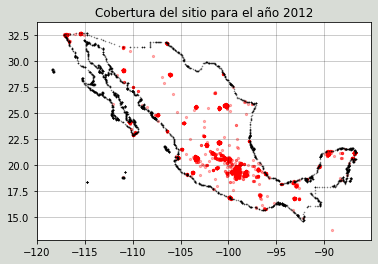

In [17]:
coordenadas_al_2012 = coordenadas_ok.loc[coordenadas_ok['anio'] == 2012]
graficar_plano(coordenadas_al_2012, '2012')

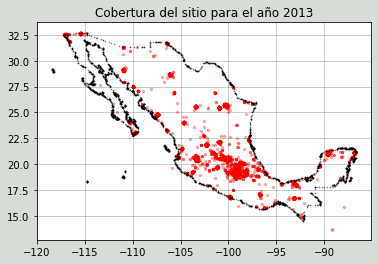

In [18]:
coordenadas_al_2013 = coordenadas_ok.loc[(coordenadas_ok['anio'] == 2013) | 
                                         (coordenadas_ok['anio'] == 2012)]
graficar_plano(coordenadas_al_2013, '2013')

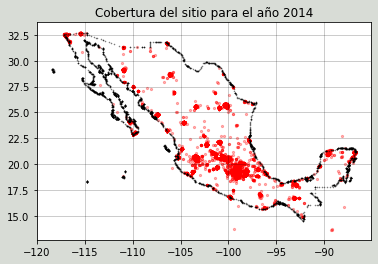

In [19]:
coordenadas_al_2014 = coordenadas_ok.loc[(coordenadas_ok['anio'] == 2014) | 
                                         (coordenadas_ok['anio'] == 2013) | 
                                         (coordenadas_ok['anio'] == 2012)]
graficar_plano(coordenadas_al_2014, '2014')

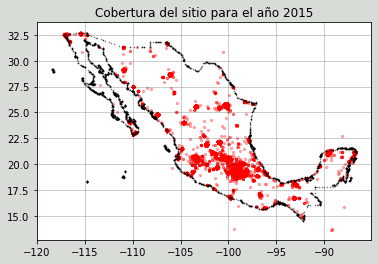

In [20]:
coordenadas_al_2015 = coordenadas_ok.loc[(coordenadas_ok['anio'] == 2015) |
                                         (coordenadas_ok['anio'] == 2014) | 
                                         (coordenadas_ok['anio'] == 2013) | 
                                         (coordenadas_ok['anio'] == 2012)]
graficar_plano(coordenadas_al_2015, '2015')

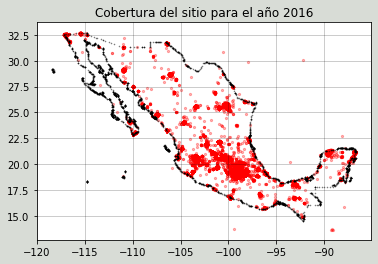

In [21]:
coordenadas_al_2016 = coordenadas_ok.loc[(coordenadas_ok['anio'] == 2016) |
                                         (coordenadas_ok['anio'] == 2015) |
                                         (coordenadas_ok['anio'] == 2014) | 
                                         (coordenadas_ok['anio'] == 2013) | 
                                         (coordenadas_ok['anio'] == 2012)]
graficar_plano(coordenadas_al_2016, '2016')